#1. Data Preprocessing

In [1]:
#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Model Development and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/lending_data.csv")
data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
data.shape #No of samples and No of Features

(77536, 8)

In [4]:
data.dtypes #Datatype of each column

,0
loan_size,float64
interest_rate,float64
borrower_income,int64
debt_to_income,float64
num_of_accounts,int64
derogatory_marks,int64
total_debt,int64
loan_status,int64


In [5]:
#printing the target variable distribution
print("\nTarget Variable Distribution:")
print(data['loan_status'].value_counts())


Target Variable Distribution:
loan_status
0    75036
1     2500
Name: count, dtype: int64


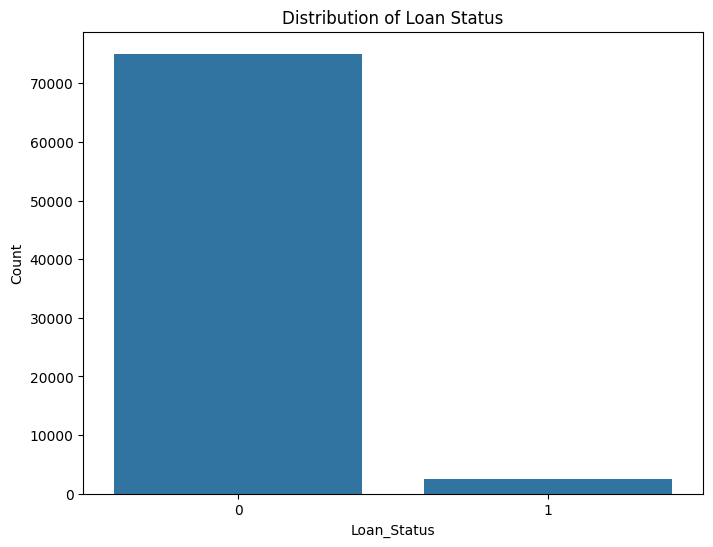

In [6]:
#graph representation for distrubution of target variable
class_counts = data['loan_status'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

In [7]:
data.describe() #summary statistics

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


#Handling the missing values

In [8]:
#Checking null values in the dataset
missing_values = data.isnull().sum()
missing_values

,0
loan_size,0
interest_rate,0
borrower_income,0
debt_to_income,0
num_of_accounts,0
derogatory_marks,0
total_debt,0
loan_status,0


#Handling  Outliers

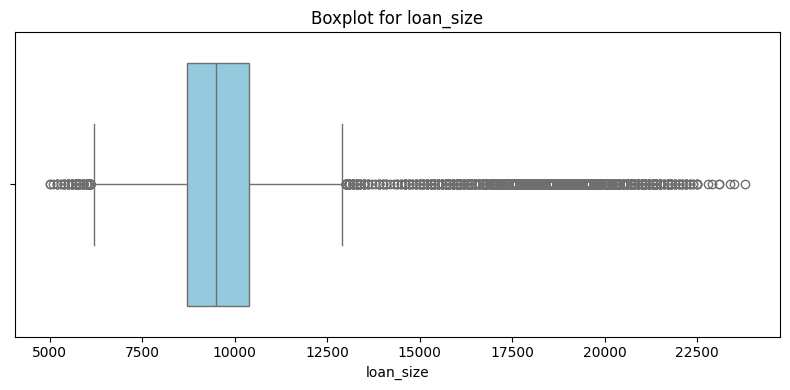

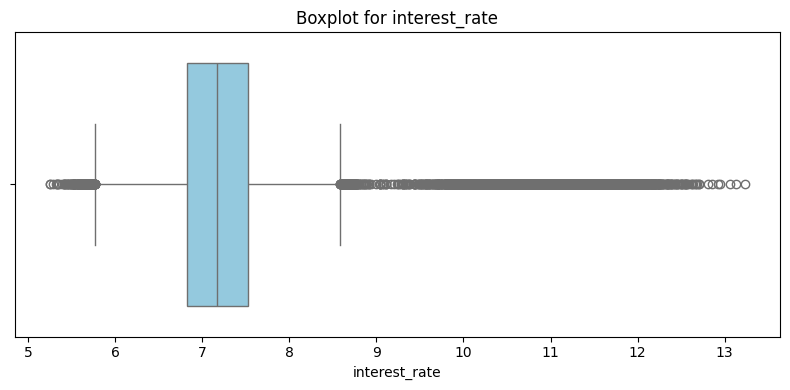

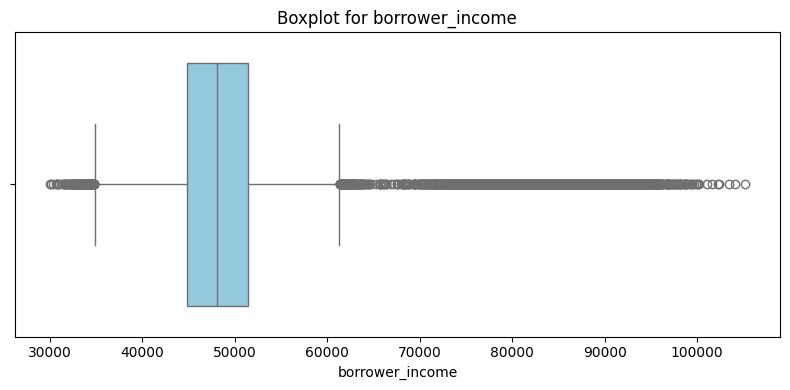

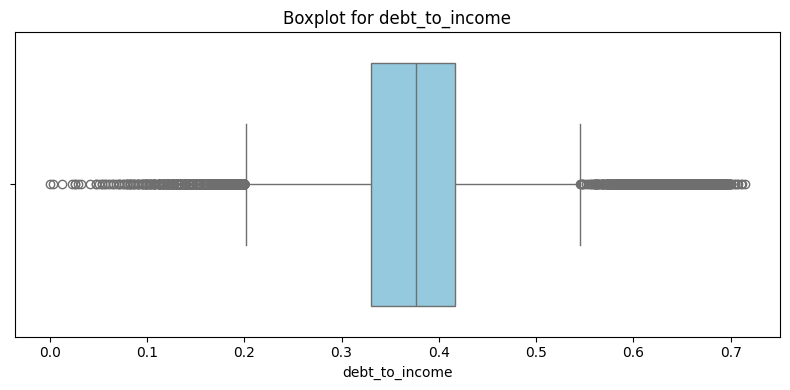

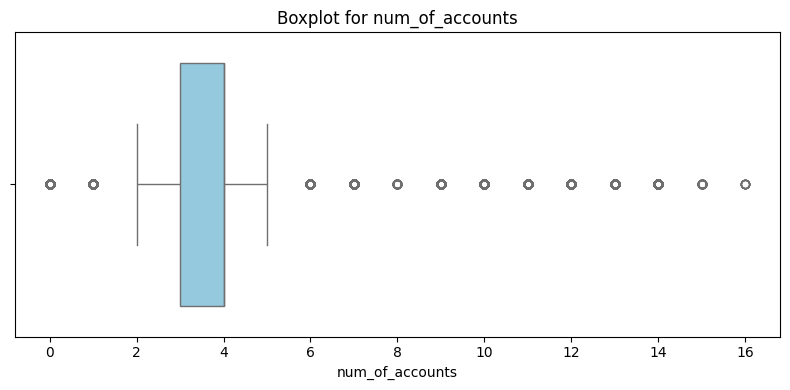

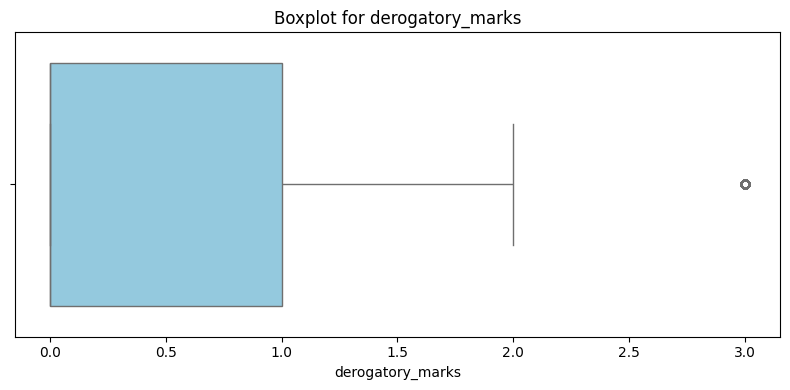

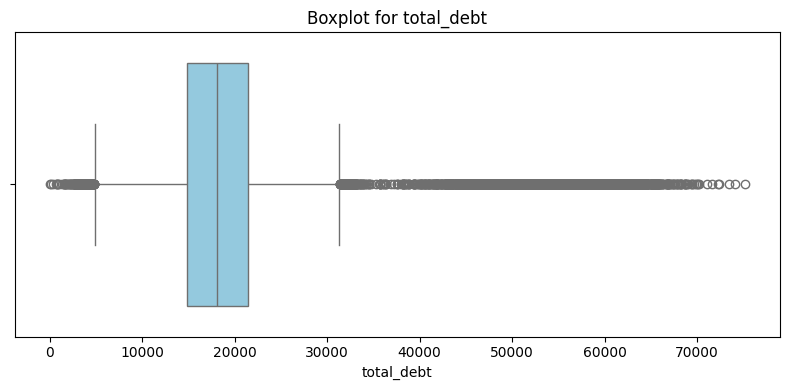

In [9]:
#Checking for the outliers from each feature
features = [col for col in data.columns if col != 'loan_status']

for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [10]:
from scipy.stats.mstats import winsorize

# percentage limmit for winsorization
winsorize_percentage = 0.07
#removing the outilers
data[features] = data[features].apply(lambda x: winsorize(x, limits=winsorize_percentage))


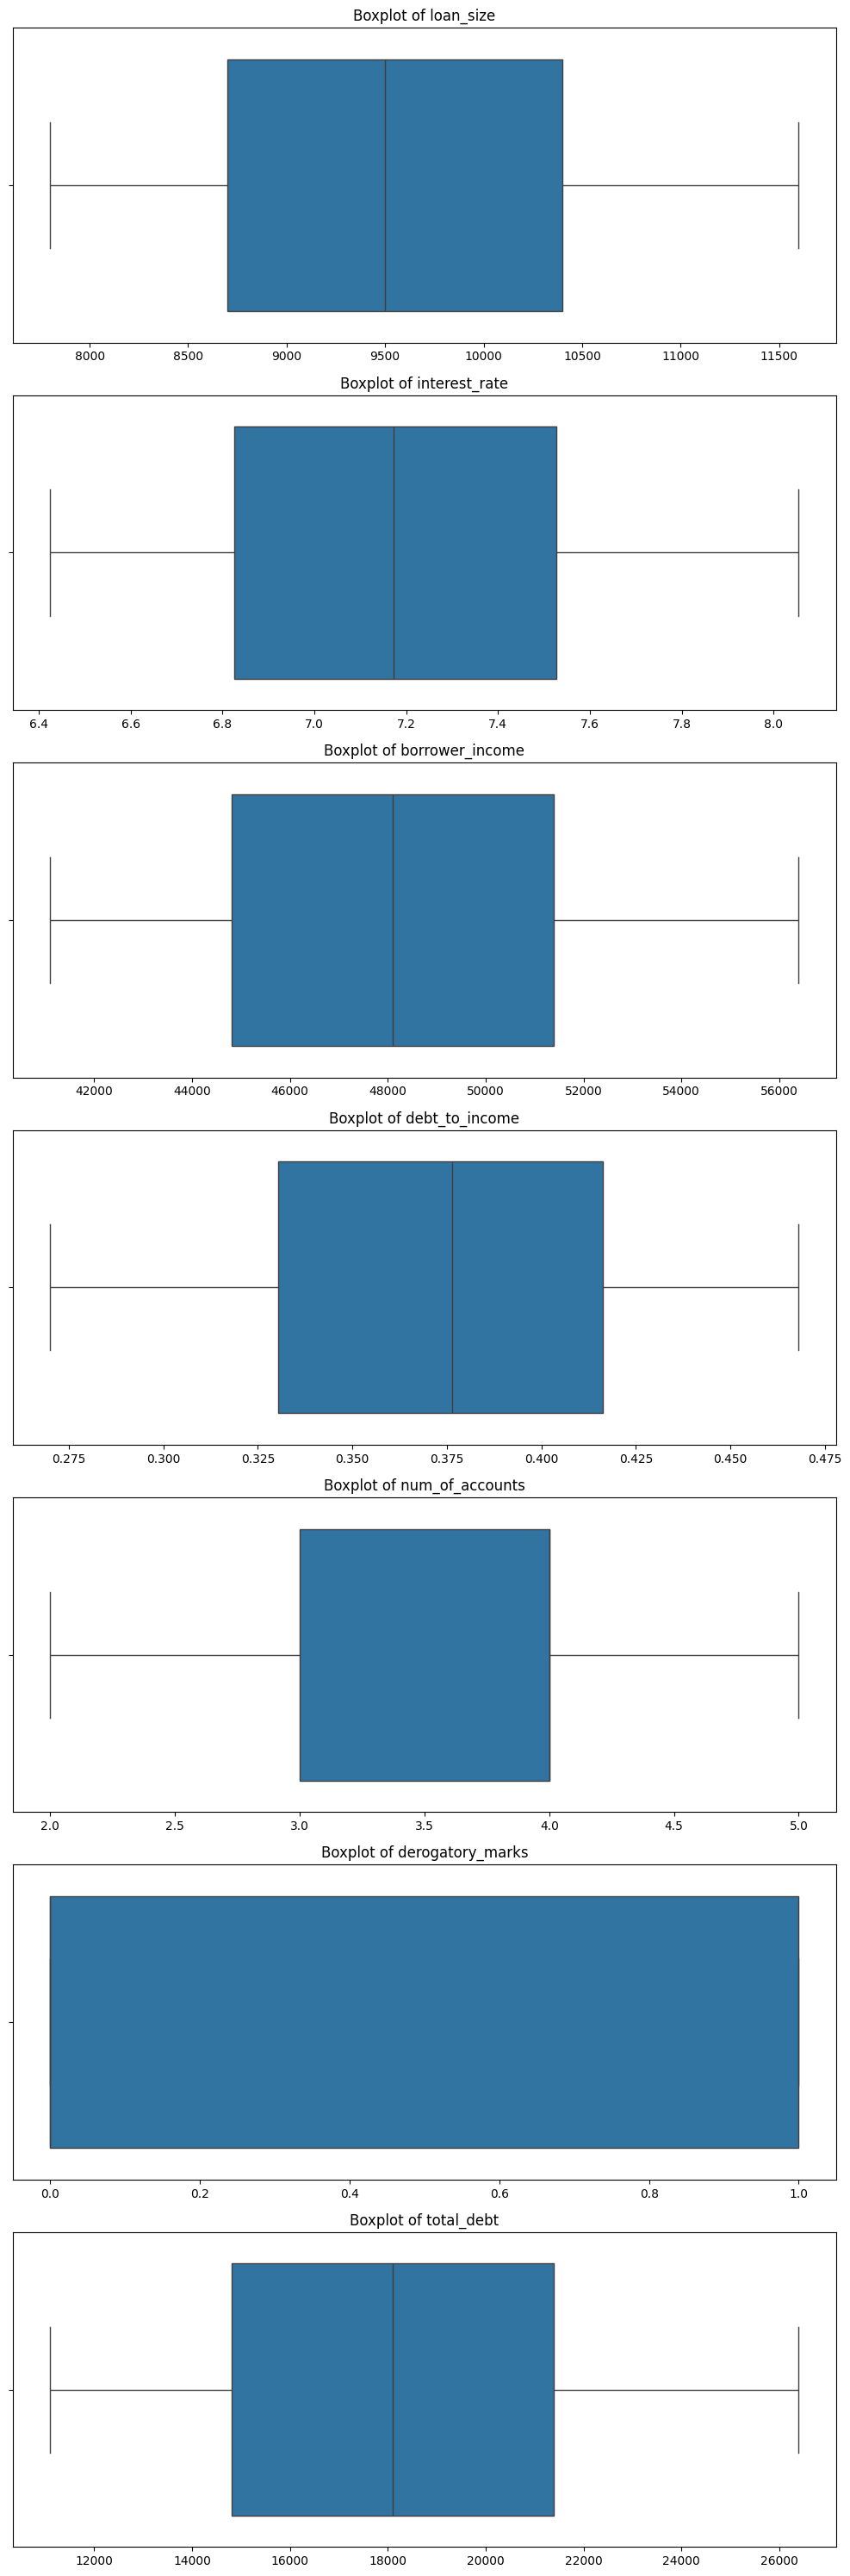

In [11]:

fig, axes = plt.subplots(nrows=len(features), figsize=(10, 30))
for i, feature in enumerate(features):
  if feature!='loan_status':
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel('')


plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

In [12]:
# # Storing outlier count
# outlier_counts_before = {}
# outlier = set()

# # used  IQR for Outlier Detection and Removal
# for feature in features:
#     if pd.api.types.is_numeric_dtype(data[feature]):
#         Q1 = data[feature].quantile(0.25)
#         Q3 = data[feature].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         outlier_mask = (data[feature] < lower_bound) | (data[feature] > upper_bound)
#         outlier_counts_before[feature] = outlier_mask.sum()

#         outlier.update(data[outlier_mask].index)

# # Dropping all outlier rows
# data = data.drop(index=outlier).reset_index(drop=True)

# # Printing the values
# print("\nOutlier Counts Per Feature (Before Removal):")
# for feature, count in outlier_counts_before.items():
#     print(f"{feature}: {count} outliers")

# print(f"\nTotal rows removed as outliers: {len(outlier)}")
# print(f"New dataset shape: {data.shape}")

# # Visualizing boxplots after outlier removal
# for col in features:
#     if pd.api.types.is_numeric_dtype(data[col]):
#         plt.figure(figsize=(8, 4))
#         sns.boxplot(x=data[col], color='skyblue')
#         plt.title(f'Boxplot for {col} (After Outlier Removal)')
#         plt.xlabel(col)
#         plt.tight_layout()
#         plt.show()


# Feature Engineering



In [13]:
data['income_to_loan_ratio'] = data['borrower_income'] / data['loan_size']

In [14]:
#Printing the data shape
data.shape #After removing the outliers

(77536, 9)

#2. EDA -Exploratory Data Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_column(data, column, target_column):
  """Analyze a single column against the target."""

  # # Histogram
  plt.figure(figsize=(8, 6))
  sns.histplot(data[column], kde=True)
  plt.title(f'{column} Distribution')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

  # Correlation
  correlation = data[[column, target_column]].corr().iloc[0, 1]
  print(f'Correlation between {column} and {target_column}: {correlation}')


def analyze_all_columns(data, target_column):
  """Analyze all columns against the target."""
  feature_columns = [col for col in data.columns if col != target_column]
  for column in feature_columns:
    analyze_column(data, column, target_column)

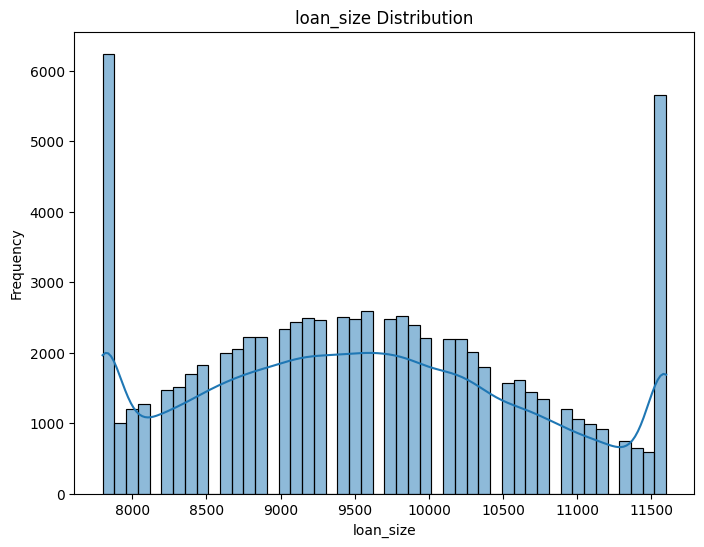

Correlation between loan_size and loan_status: 0.3319610014059974


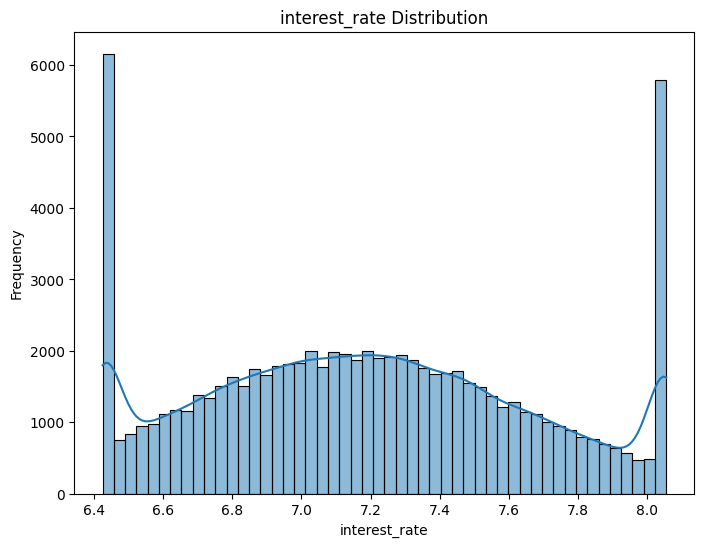

Correlation between interest_rate and loan_status: 0.3313211049674746


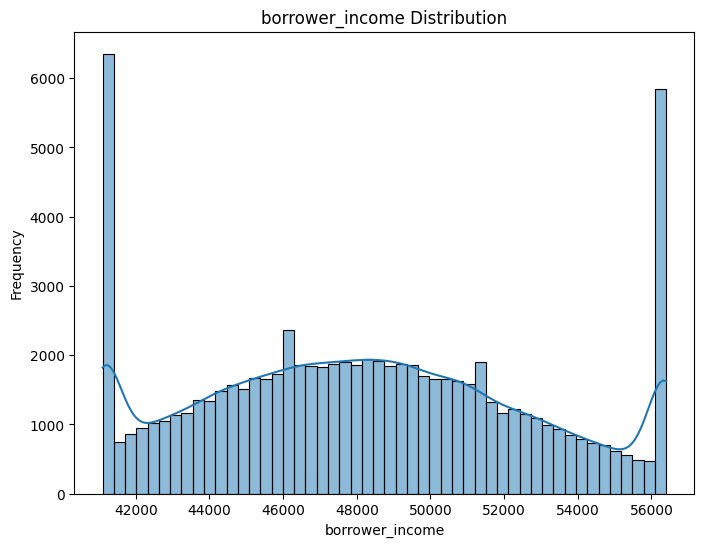

Correlation between borrower_income and loan_status: 0.3315405735678302


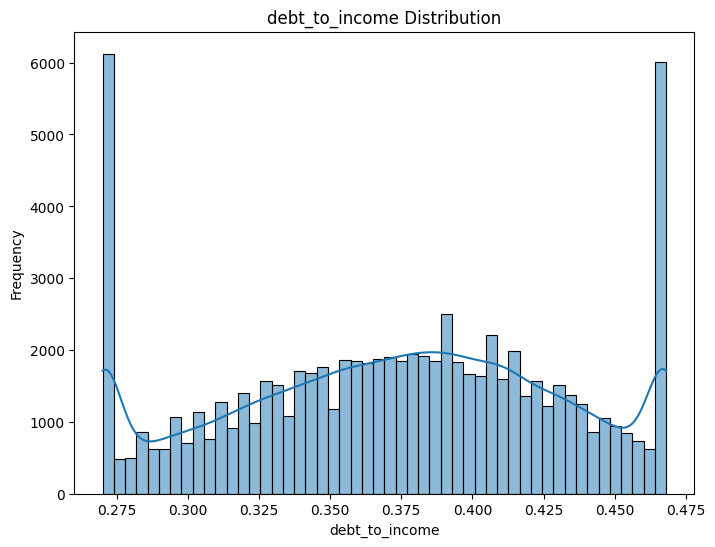

Correlation between debt_to_income and loan_status: 0.29836533491762857


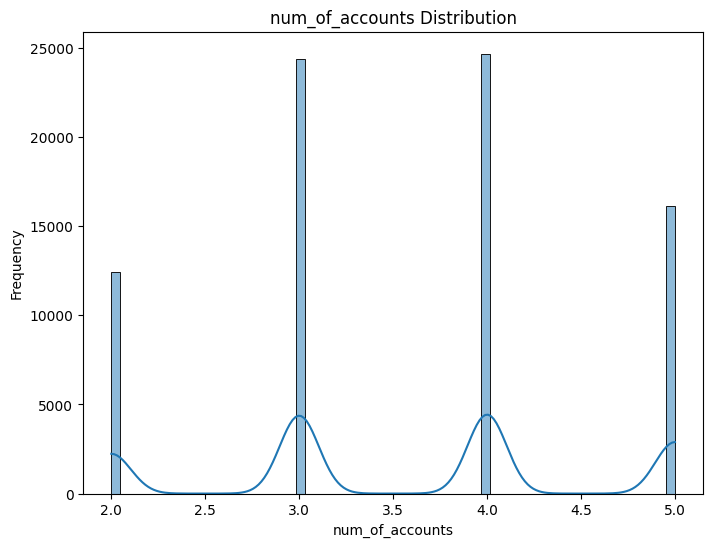

Correlation between num_of_accounts and loan_status: 0.26171437201995595


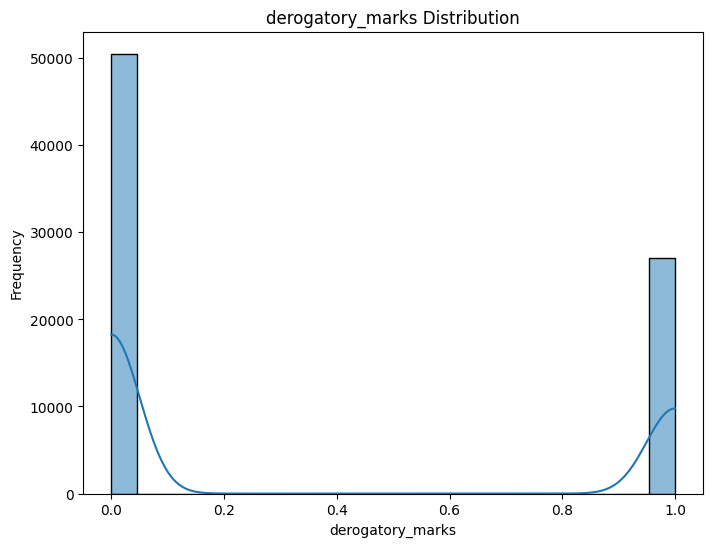

Correlation between derogatory_marks and loan_status: 0.24791171802069778


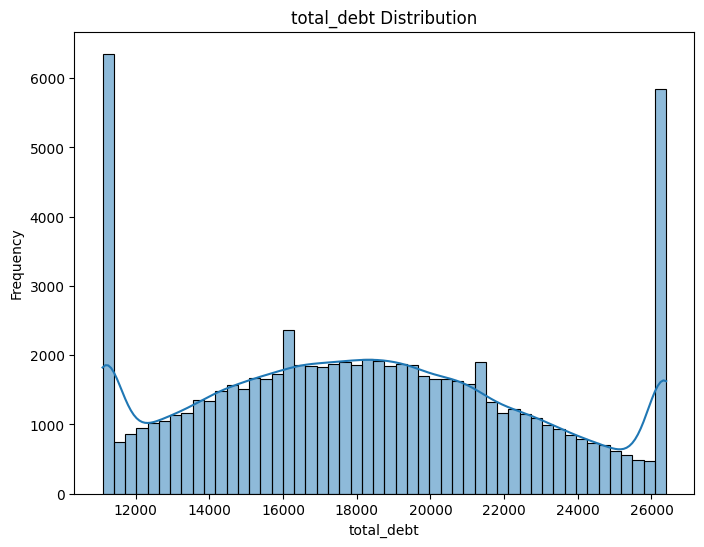

Correlation between total_debt and loan_status: 0.3315405735678413


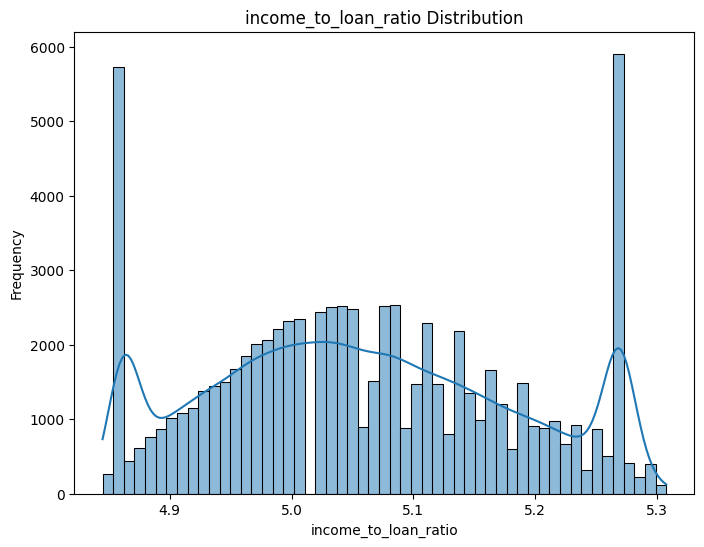

Correlation between income_to_loan_ratio and loan_status: -0.2908682856881797


In [16]:
analyze_all_columns(data,'loan_status')

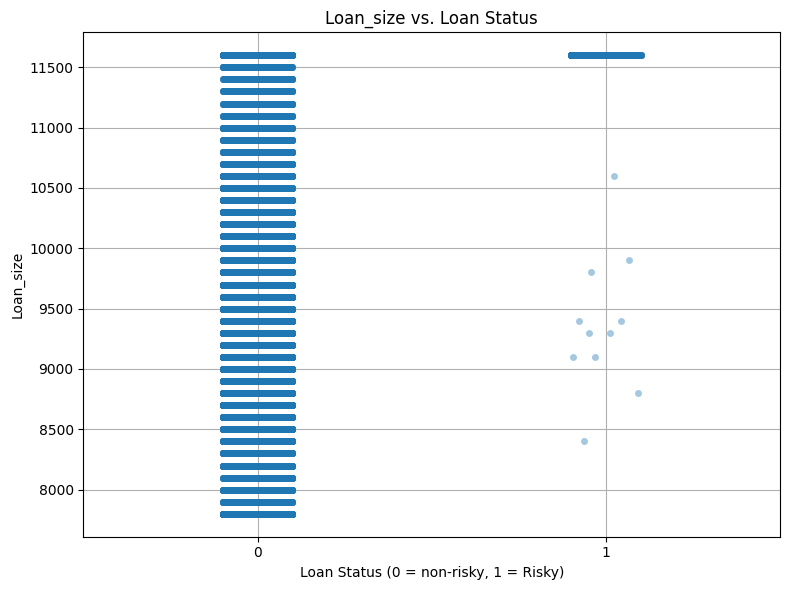

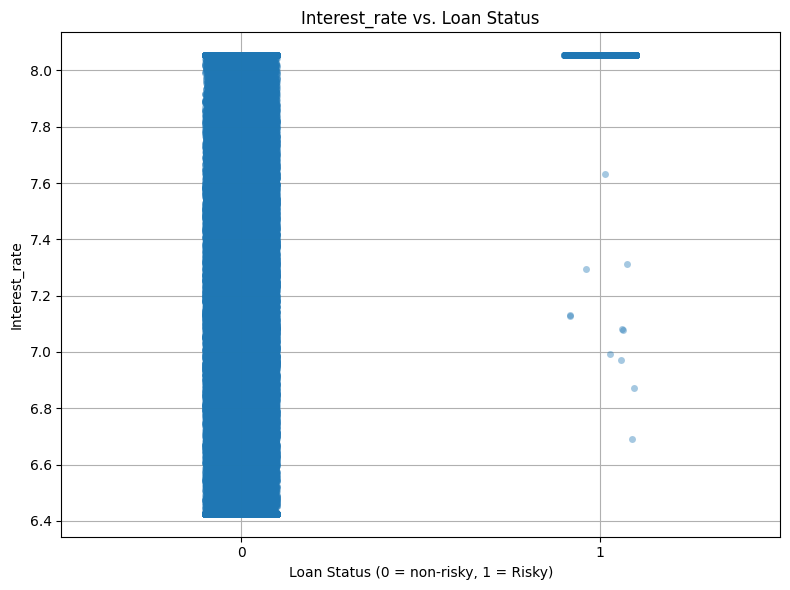

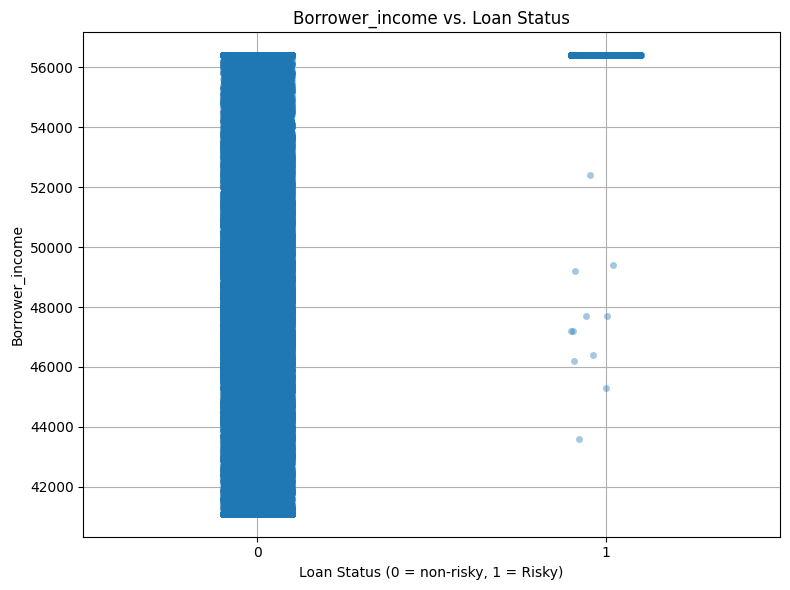

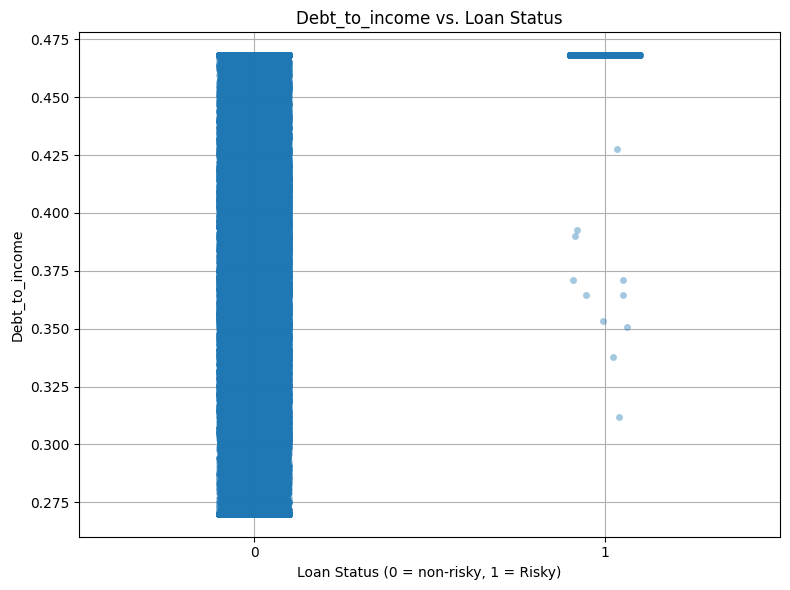

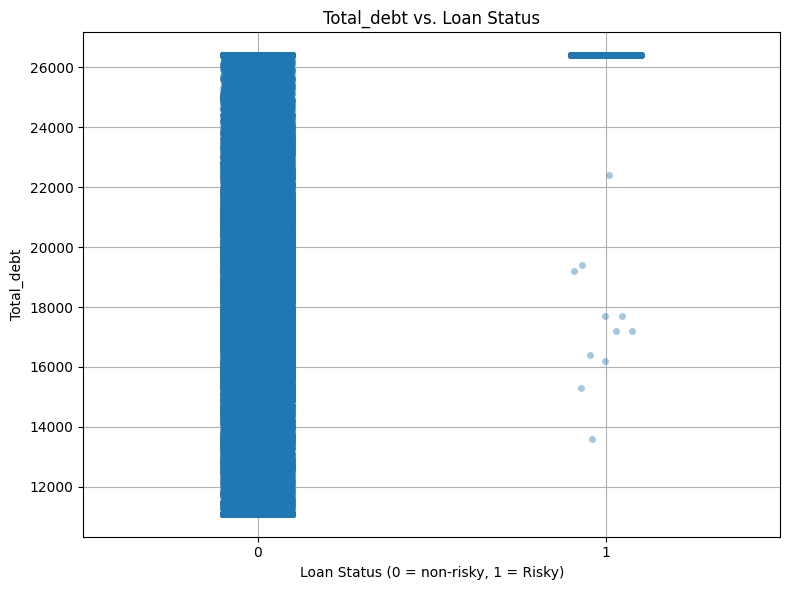

In [17]:
numerical_features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'total_debt']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.stripplot(x='loan_status', y=feature, data=data,jitter=True, alpha=0.4)
    plt.title(f'{feature.capitalize()} vs. Loan Status')
    plt.xlabel('Loan Status (0 = non-risky, 1 = Risky)')
    plt.ylabel(feature.capitalize())
    plt.grid(True)
    plt.tight_layout()
    plt.show()


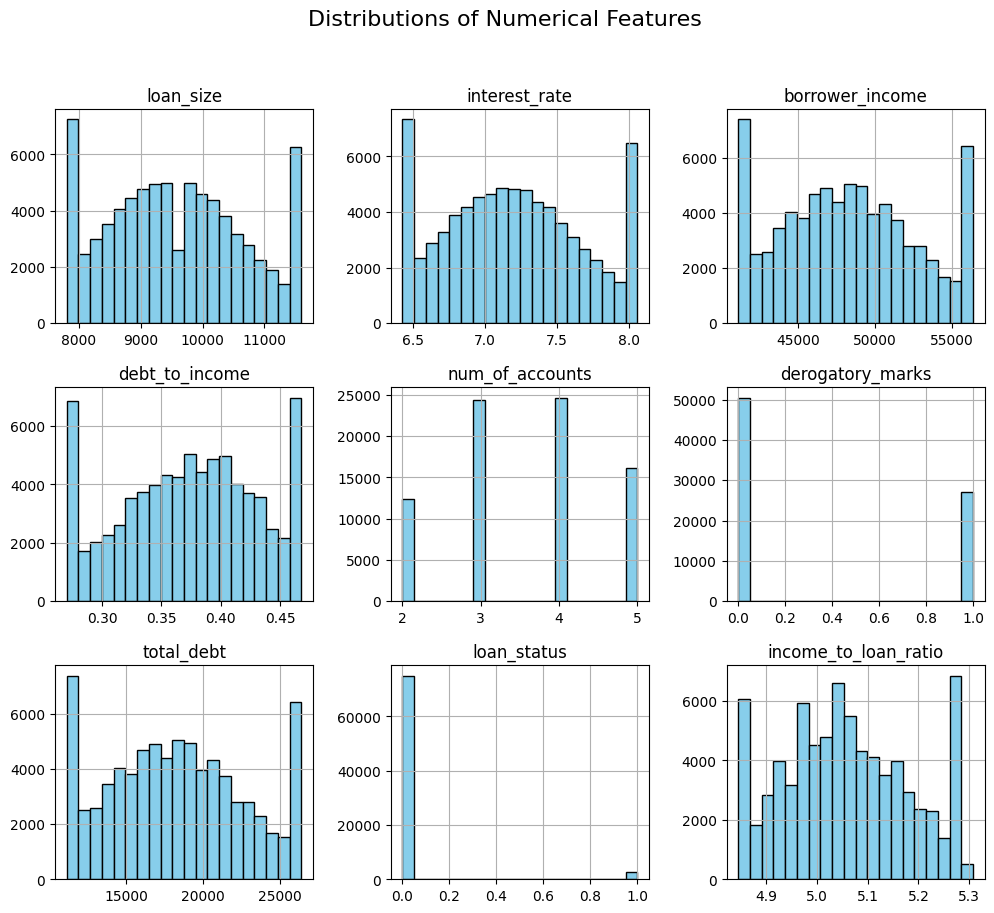

In [18]:
# Feature Distributions
data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()

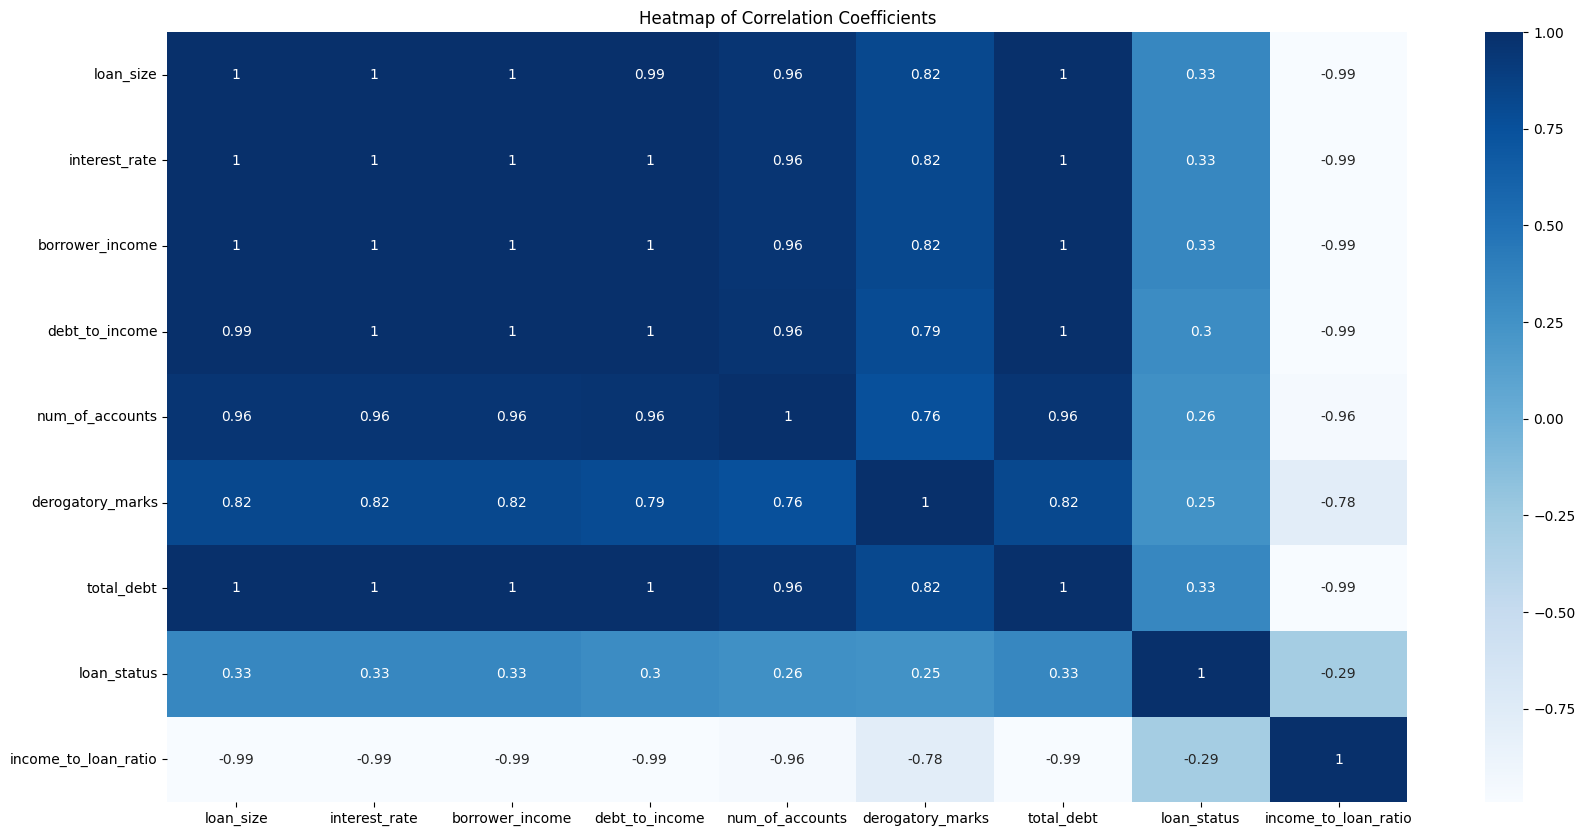

In [19]:
# Heat Map
correlation_matrix = data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', cbar=True)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

#Handling imbalanced data

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [21]:
print("Original Shape of X:", X.shape)
print("Original Shape of y:", y.shape)
print("\nOriginal class distribution:\n", y.value_counts())

Original Shape of X: (77536, 8)
Original Shape of y: (77536,)

Original class distribution:
 loan_status
0    75036
1     2500
Name: count, dtype: int64


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [23]:
# Applying SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE on training data:")
print("X_train_sm shape:", X_train_sm.shape)
print("y_train_sm distribution:\n", y_train_sm.value_counts())


After SMOTE on training data:
X_train_sm shape: (120056, 8)
y_train_sm distribution:
 loan_status
0    60028
1    60028
Name: count, dtype: int64


#3.Model Development

#Feature Scaling

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

In [25]:
model=[]
name=[]
res=[]

# Random forest Classifier

In [26]:
# Training Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_sm)

# Predicting on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluating metrics for confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Accuracy
testing_accuracy = accuracy_score(y_test, y_pred)
print(f'The  accuracy with the Random Forest model is {testing_accuracy:}')

# Storing results
name.append('RandomForestClassifier')
res.append(testing_accuracy)


[[14438   570]
 [    1   499]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15008
           1       0.47      1.00      0.64       500

    accuracy                           0.96     15508
   macro avg       0.73      0.98      0.81     15508
weighted avg       0.98      0.96      0.97     15508

The  accuracy with the Random Forest model is 0.9631802940417848


ROC AUC: 0.98


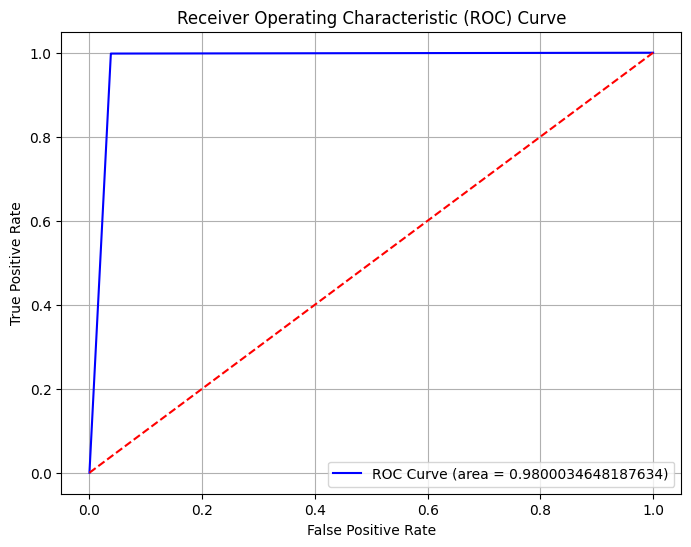

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculating ROC AUC Score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')

# Generating ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [28]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)

tree.fit(X_train_scaled, y_train_sm)
y_pred = tree.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Printing the accuracy score the accuracy
testing_accuracy = accuracy_score(y_test, y_pred)

print(f'The accuracy with the original data is {testing_accuracy}')


name.append(' DecisionTreeClassifier')
res.append(testing_accuracy)

[[14438   570]
 [    1   499]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15008
           1       0.47      1.00      0.64       500

    accuracy                           0.96     15508
   macro avg       0.73      0.98      0.81     15508
weighted avg       0.98      0.96      0.97     15508

The accuracy with the original data is 0.9631802940417848


In [29]:
!pip install lightgbm
from lightgbm import LGBMClassifier



lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_scaled, y_train_sm)

y_pred_lgbm = lgbm.predict(X_test_scaled)
testing_accuracy=accuracy_score(y_test, y_pred_lgbm)
print(confusion_matrix(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

print("LightGBM")
print("Accuracy:", testing_accuracy)
print(f'The accuracy with the original data is {testing_accuracy}')
name.append(' LGBMClassifier')
res.append(testing_accuracy)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 60028, number of negative: 60028
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 120056, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[[14438   570]
 [    1   499]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15008
           1       0.47      1.00      0.64       500

    accuracy                           0.96     15508
   macro avg       0.73      0.98      0.81     15508
weighted avg       0.98      0.96      0.97     15508

LightGBM
Accuracy: 0.9631802940417848
The accuracy with the original data is 0.9631802940417848


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [30]:
!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train_sm)
y_pred_xgb = xgb.predict(X_test_scaled)
testing_accuracy=accuracy_score(y_test, y_pred_xgb)

print(" XGBoost")
print("Accuracy:", testing_accuracy )
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(f'The accuracy with the original data is {testing_accuracy}')


name.append(' XGBClassifier')
res.append(testing_accuracy)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:08:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost
Accuracy: 0.9629223626515347
[[14434   574]
 [    1   499]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15008
           1       0.47      1.00      0.63       500

    accuracy                           0.96     15508
   macro avg       0.73      0.98      0.81     15508
weighted avg       0.98      0.96      0.97     15508

The accuracy with the original data is 0.9629223626515347


In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

ada_model.fit(X_train_scaled, y_train_sm)

y_pred = ada_model.predict(X_test_scaled)
print("AdaBoostClassifier")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
testing_accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy with AdaBoost is {testing_accuracy}')


name.append('AdaBoostClassifier')
res.append(testing_accuracy)

AdaBoostClassifier
[[14438   570]
 [    1   499]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15008
           1       0.47      1.00      0.64       500

    accuracy                           0.96     15508
   macro avg       0.73      0.98      0.81     15508
weighted avg       0.98      0.96      0.97     15508

The accuracy with AdaBoost is 0.9631802940417848


In [32]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train_sm)
y_pred_lr = lr.predict(X_test_scaled)
testing_accuracy=accuracy_score(y_test, y_pred_lr)

print("Logistic Regression")
print("Accuracy:", testing_accuracy)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(f'The accuracy with the original data is {testing_accuracy}')

name.append('Logistic Regression')
res.append(testing_accuracy)


Logistic Regression
Accuracy: 0.9528630384317771
[[14278   730]
 [    1   499]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     15008
           1       0.41      1.00      0.58       500

    accuracy                           0.95     15508
   macro avg       0.70      0.97      0.78     15508
weighted avg       0.98      0.95      0.96     15508

The accuracy with the original data is 0.9528630384317771


['RandomForestClassifier', ' DecisionTreeClassifier', ' LGBMClassifier', ' XGBClassifier', 'AdaBoostClassifier', 'Logistic Regression']
[0.9631802940417848, 0.9631802940417848, 0.9631802940417848, 0.9629223626515347, 0.9631802940417848, 0.9528630384317771]


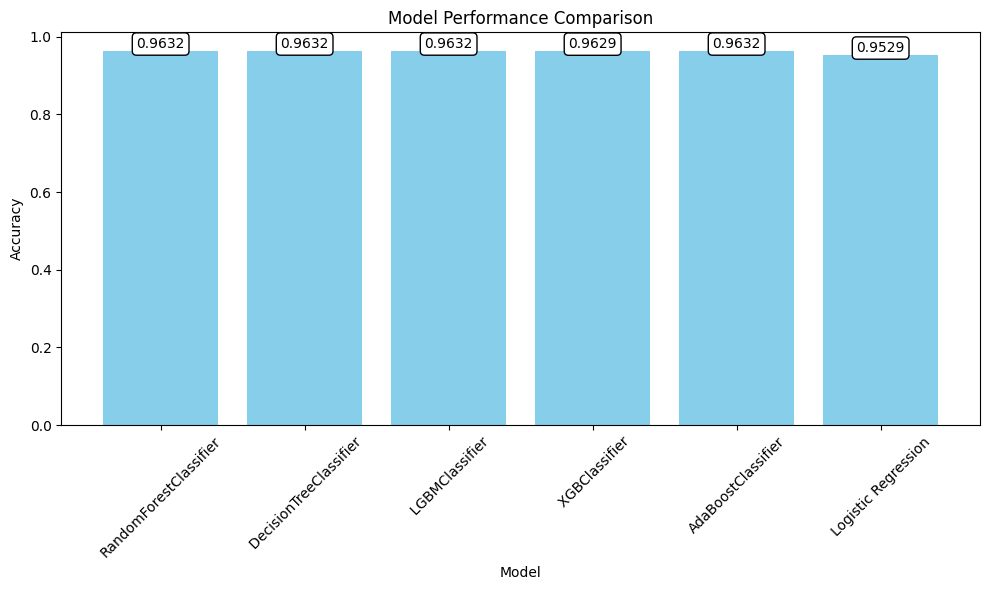

In [33]:
print(name)
print(res)

plt.figure(figsize=(10, 6))
bars = plt.bar(name, res, color='skyblue')

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, h, f'{h:.4f}',ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black') )

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Comparing the model with new data set

In [34]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [35]:
df.shape

(32581, 12)

In [36]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [37]:
print("\nTarget Variable Distribution:")
print(df['loan_status'].value_counts())


Target Variable Distribution:
loan_status
0    25473
1     7108
Name: count, dtype: int64


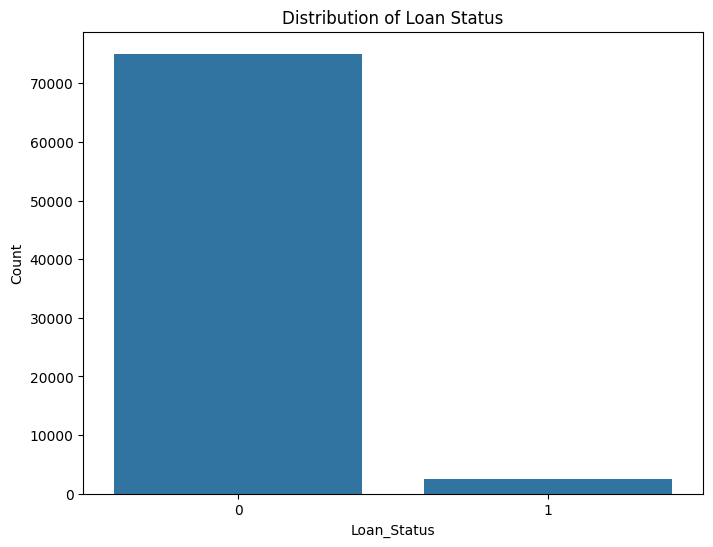

In [38]:
class_counts = data['loan_status'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

In [39]:
df.describe() #summary statistics

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [40]:
missing_values = df.isnull().sum()
missing_values

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [41]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].mean())

In [42]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [43]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() == 2:
        # Binary encoding
        df[col] = df[col].map({df[col].unique()[0]: 0, df[col].unique()[1]: 1})
    else:
        # Label encoding for more than 2 categories
        df[col] = LabelEncoder().fit_transform(df[col])


In [44]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,0,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,1,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,1,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,1,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,1,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,1,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,1,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,1,26


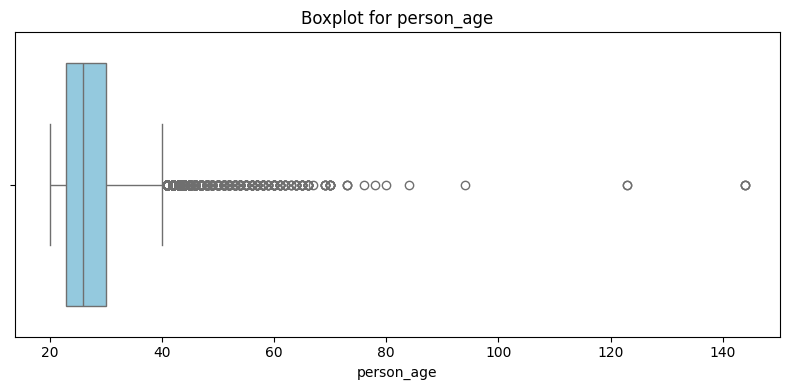

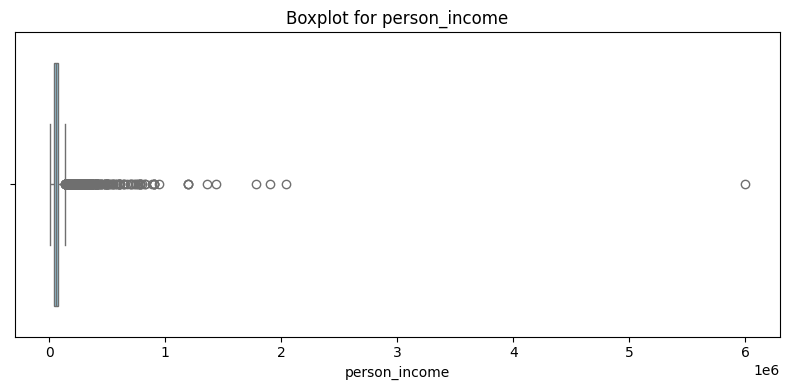

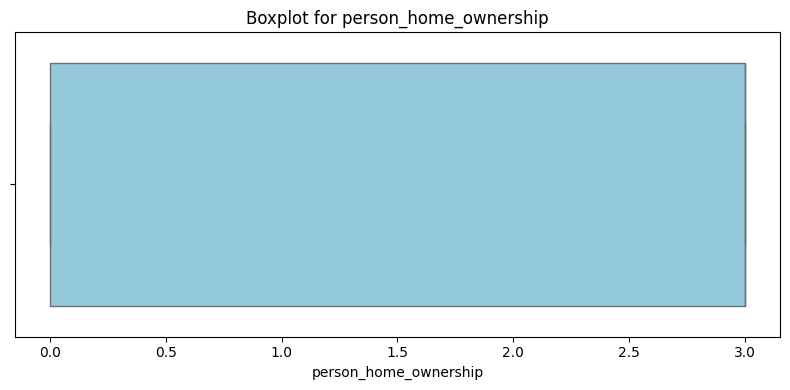

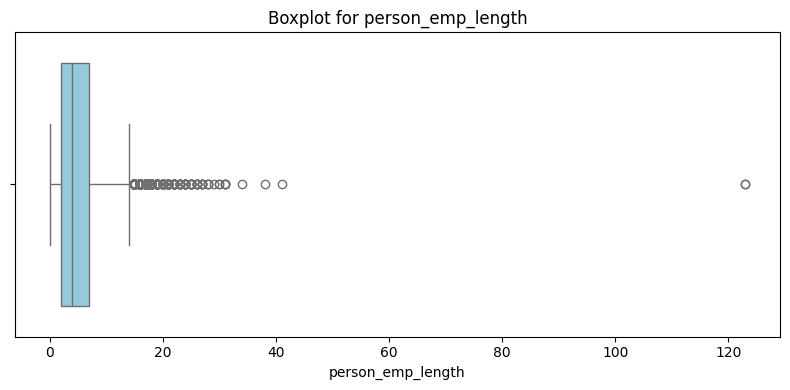

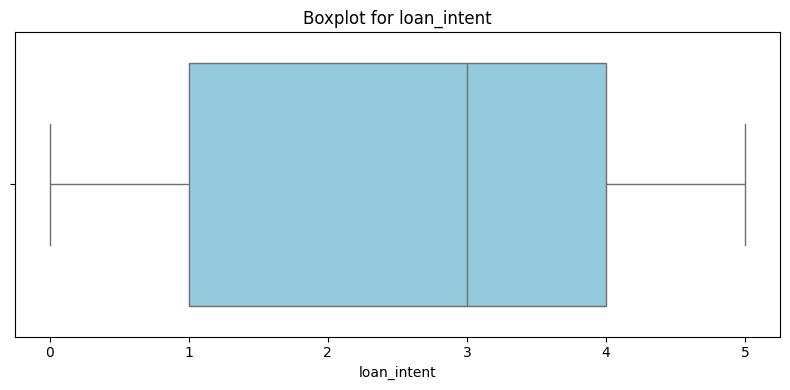

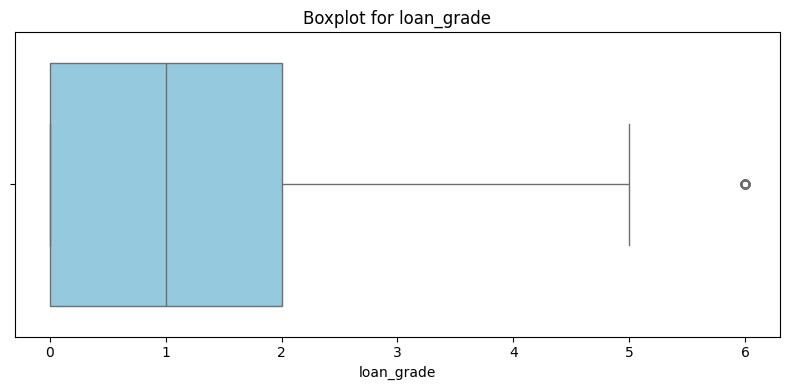

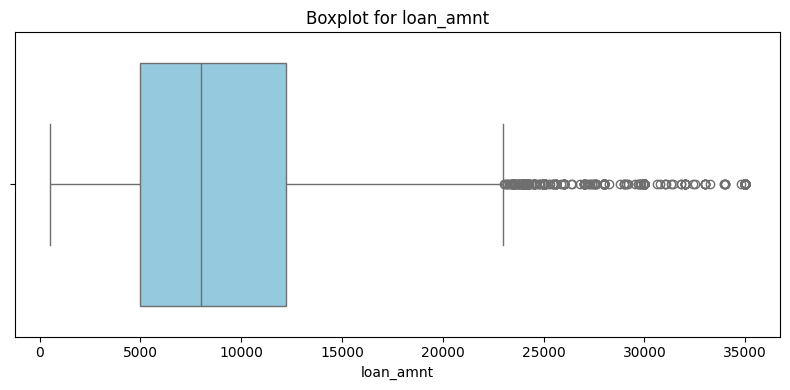

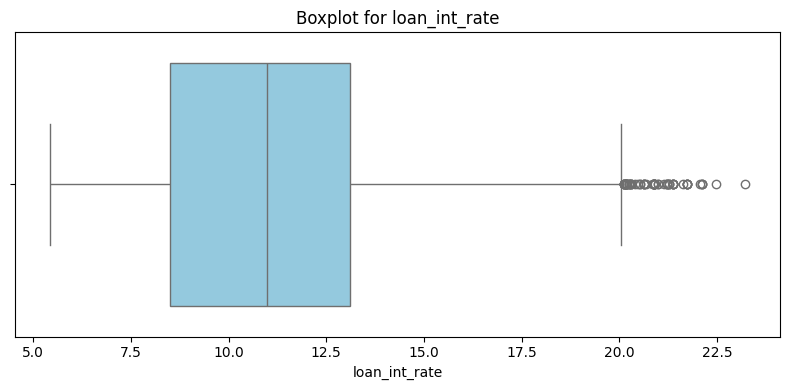

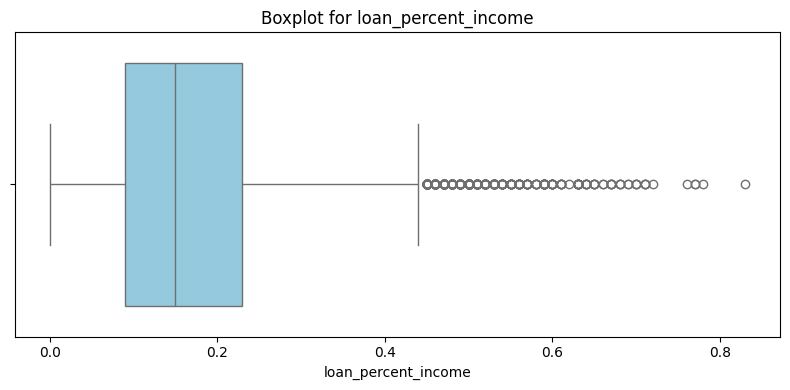

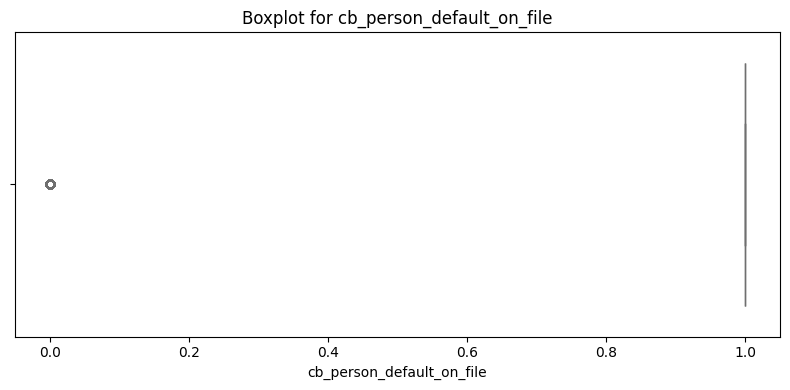

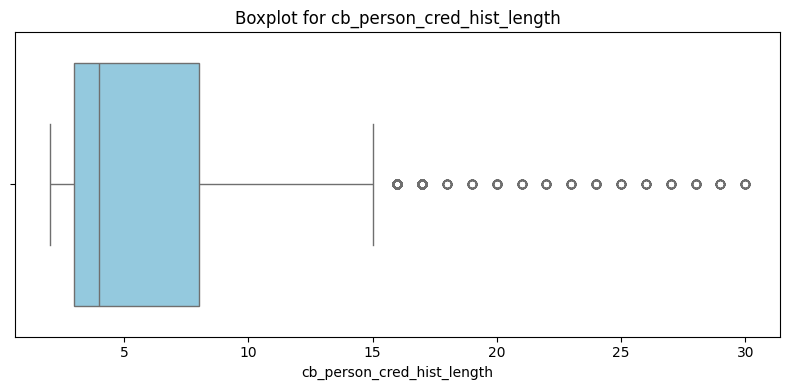

In [45]:
features = [col for col in df.columns if col != 'loan_status']
# Select only numeric columns
num_cols = df.select_dtypes(include=np.number)

# Loop through each feature
for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [46]:
from scipy.stats.mstats import winsorize

#the percentage for Winsorization
winsorize_percentage = 0.07

df[features] = df[features].apply(lambda x: winsorize(x, limits=winsorize_percentage))


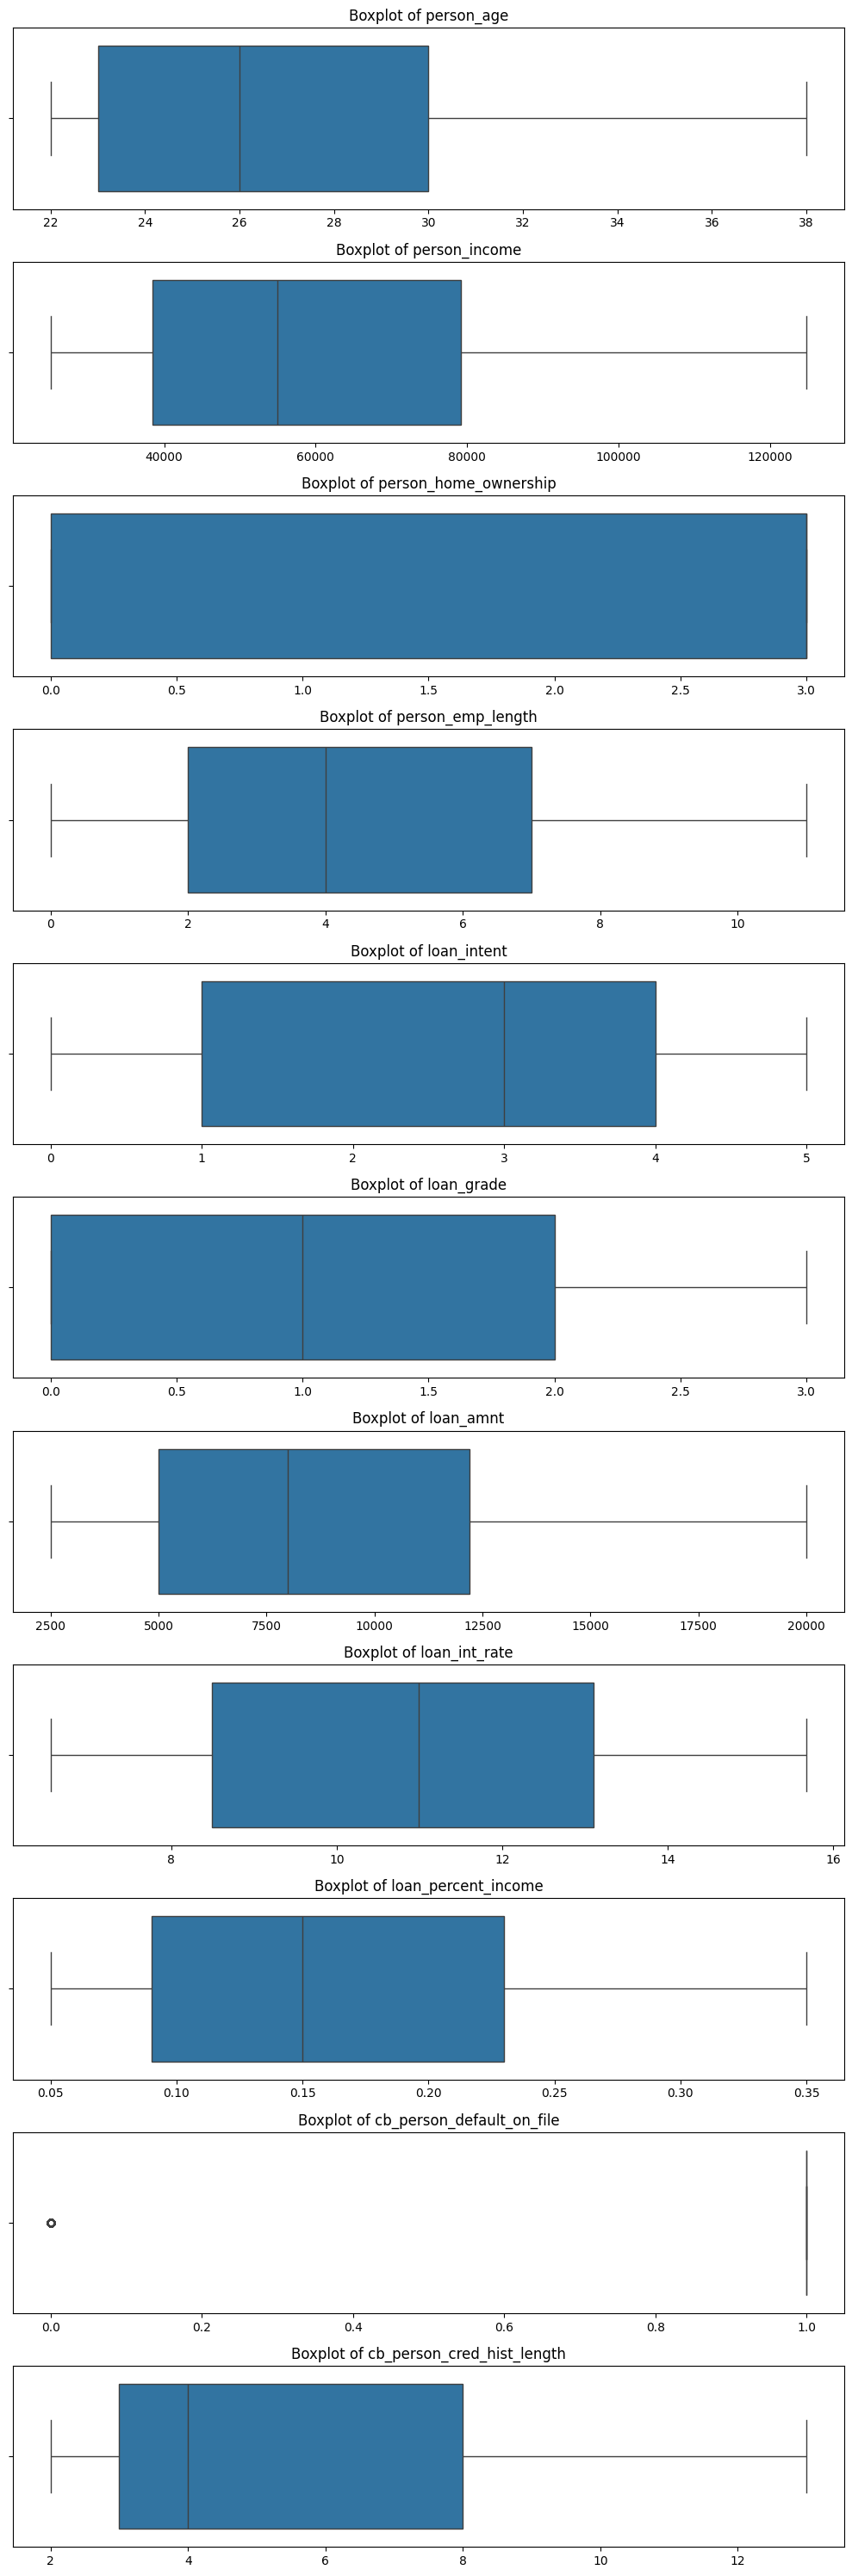

In [47]:
fig, axes = plt.subplots(nrows=len(features), figsize=(10, 30))
for i, feature in enumerate(features):
  if feature!='loan_status':
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel('')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


In [48]:

# outlier_counts_before = {}
# outlier_indices = set()

# # IQR-method used for Outlier Detection and Removal
# for feature in features:
#     if pd.api.types.is_numeric_dtype(df[feature]):
#         Q1 = df[feature].quantile(0.25)
#         Q3 = df[feature].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         outlier_mask = (df[feature] < lower_bound) | (df[feature] > upper_bound)
#         outlier_counts_before[feature] = outlier_mask.sum()

#         # Accumulate indices of outliers
#         outlier_indices.update(df[outlier_mask].index)

# # Dropping all outlier rows
# df = df.drop(index=outlier_indices).reset_index(drop=True)

# print("\nOutlier Counts Per Feature (Before Removal):")
# for feature, count in outlier_counts_before.items():
#     print(f"{feature}: {count} outliers")

# print(f"\nTotal rows removed as outliers: {len(outlier_indices)}")
# print(f"New dataset shape: {data.shape}")

# # Visualizing boxplots after outlier removal
# for col in features:
#     if pd.api.types.is_numeric_dtype(data[col]):
#         plt.figure(figsize=(8, 4))
#         sns.boxplot(x=df[col], color='skyblue')
#         plt.title(f'Boxplot for {col} (After Outlier Removal)')
#         plt.xlabel(col)
#         plt.tight_layout()
#         plt.show()


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_column(df, column, target_column):
  """Analyze a single column against the target."""

  # # Histogram
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f'{column} Distribution')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

  # Correlation
  correlation = df[[column, target_column]].corr().iloc[0, 1]
  print(f'Correlation between {column} and {target_column}: {correlation}')


def analyze_all_columns(df, target_column):
  """Analyze all columns against the target."""
  feature_columns = [col for col in df.columns if col != target_column]
  for column in feature_columns:
    analyze_column(df, column, target_column)

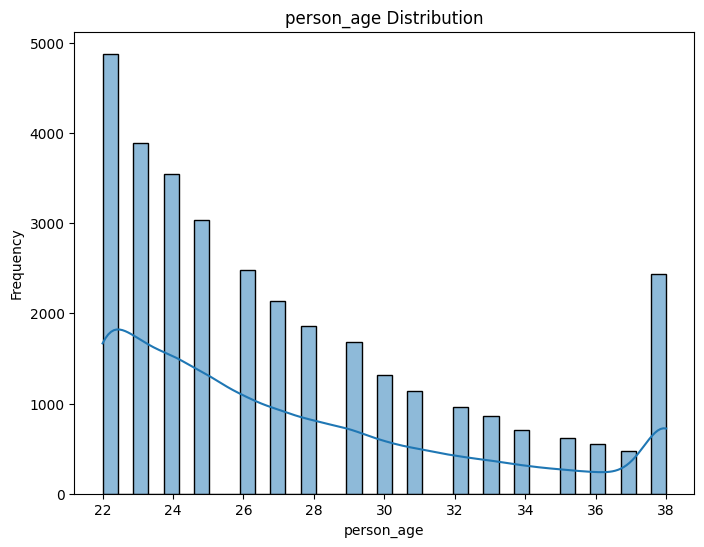

Correlation between person_age and loan_status: -0.0262299539725134


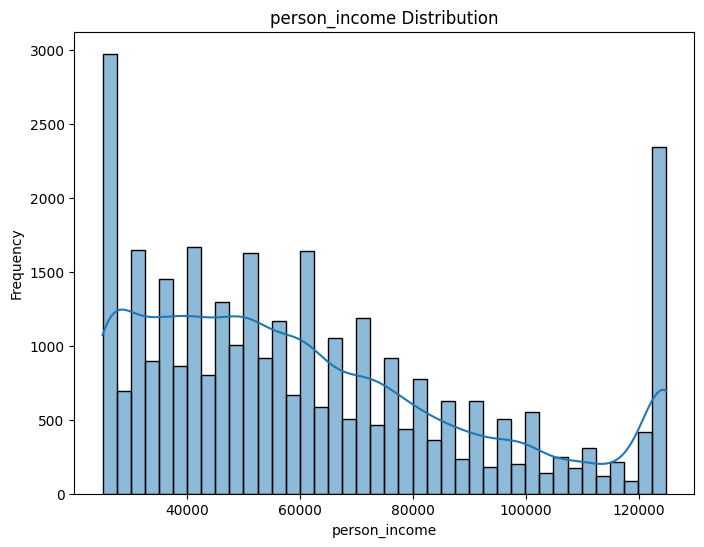

Correlation between person_income and loan_status: -0.24258327662023807


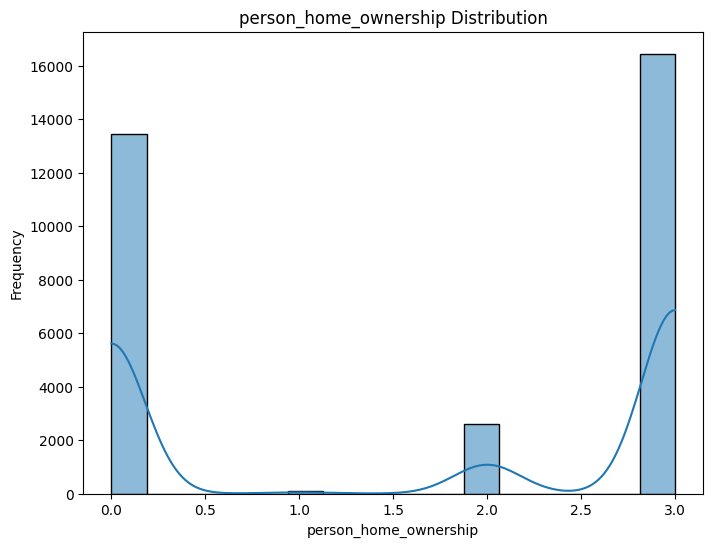

Correlation between person_home_ownership and loan_status: 0.2115999929986695


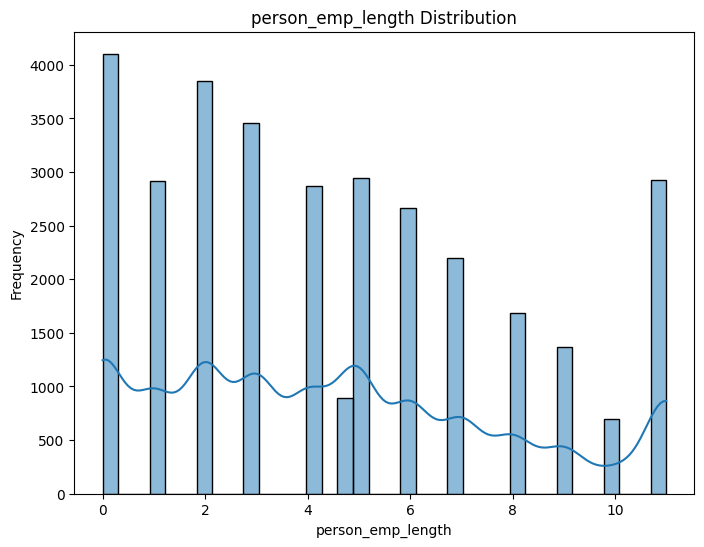

Correlation between person_emp_length and loan_status: -0.09104488528596587


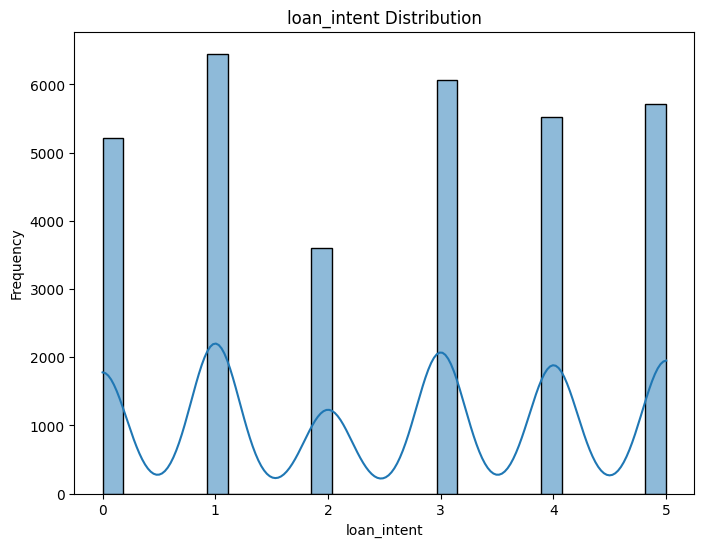

Correlation between loan_intent and loan_status: -0.06557507353586395


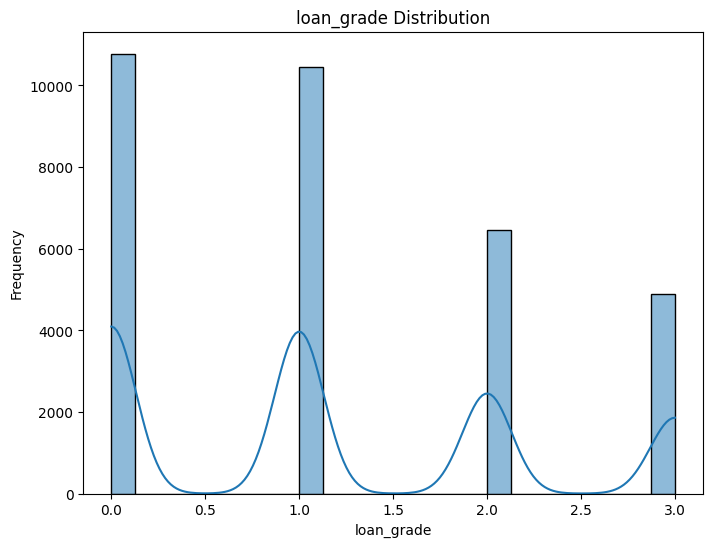

Correlation between loan_grade and loan_status: 0.3584281776326723


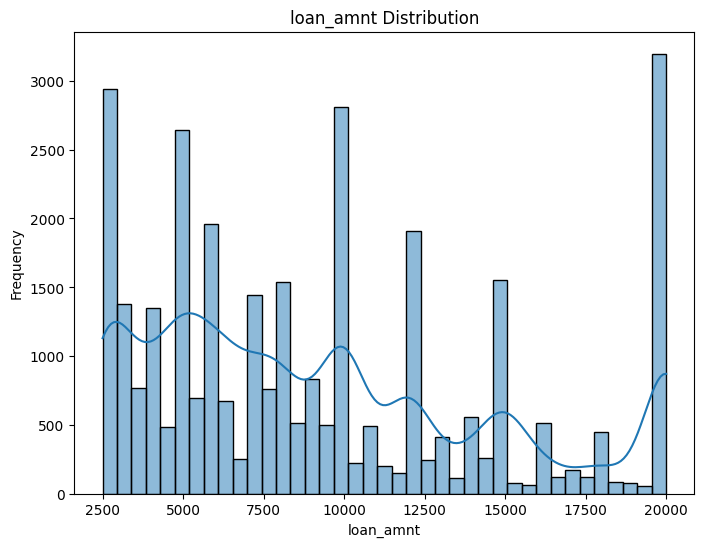

Correlation between loan_amnt and loan_status: 0.10184144155940356


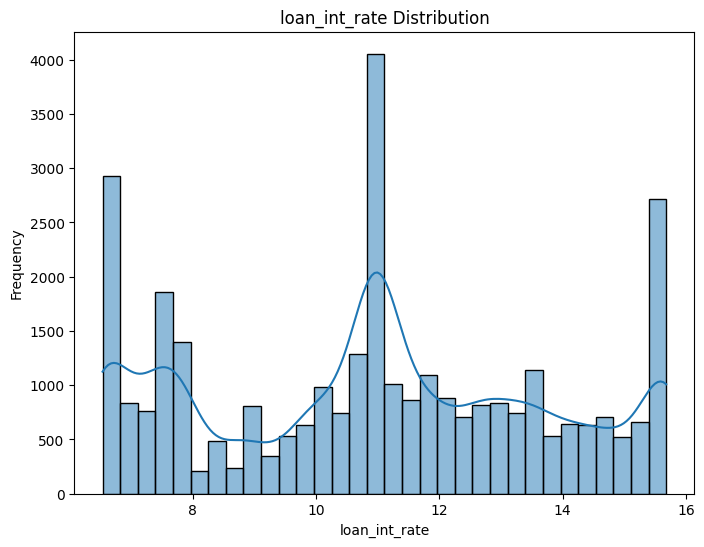

Correlation between loan_int_rate and loan_status: 0.30694634948241345


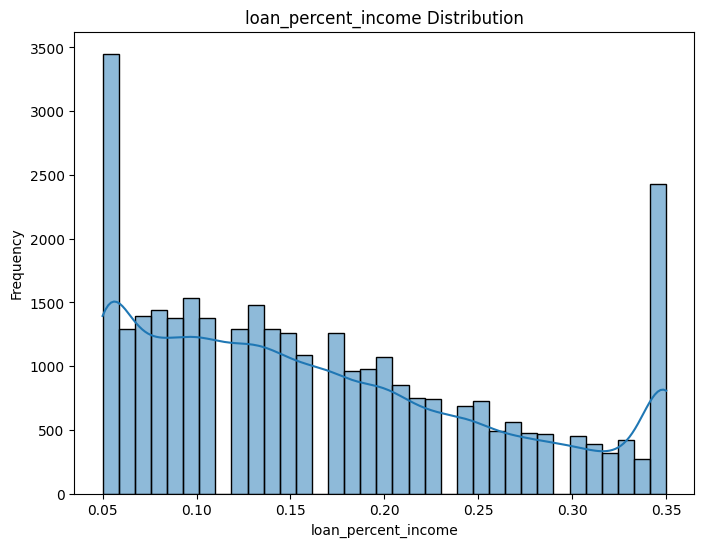

Correlation between loan_percent_income and loan_status: 0.36472911519889945


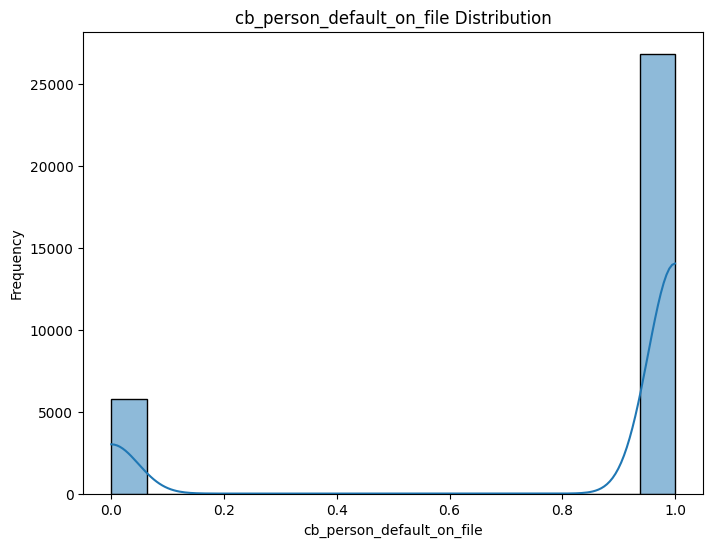

Correlation between cb_person_default_on_file and loan_status: -0.17914137370741426


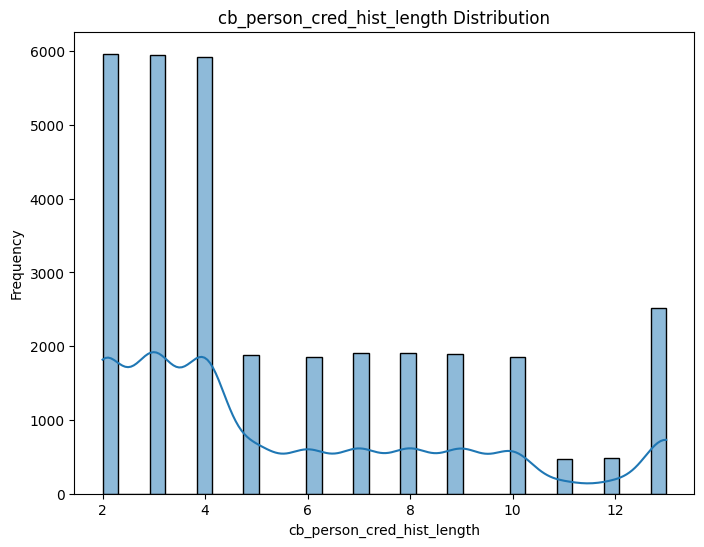

Correlation between cb_person_cred_hist_length and loan_status: -0.020443788870806105


In [50]:
analyze_all_columns(df,'loan_status')

Numerical columns:
['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']


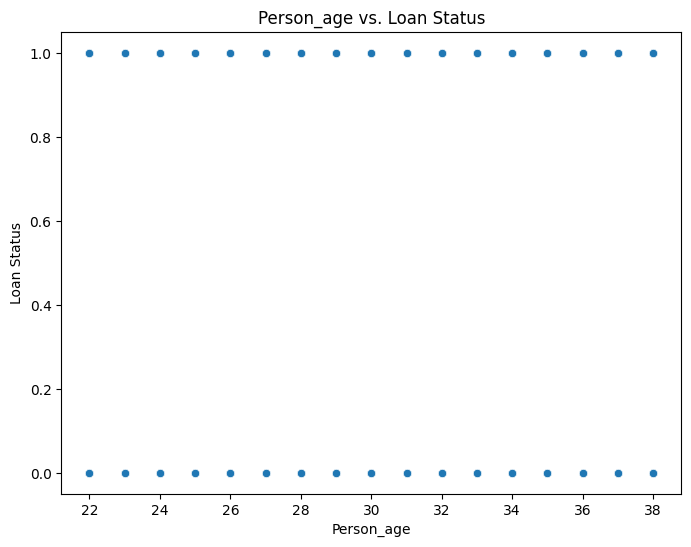

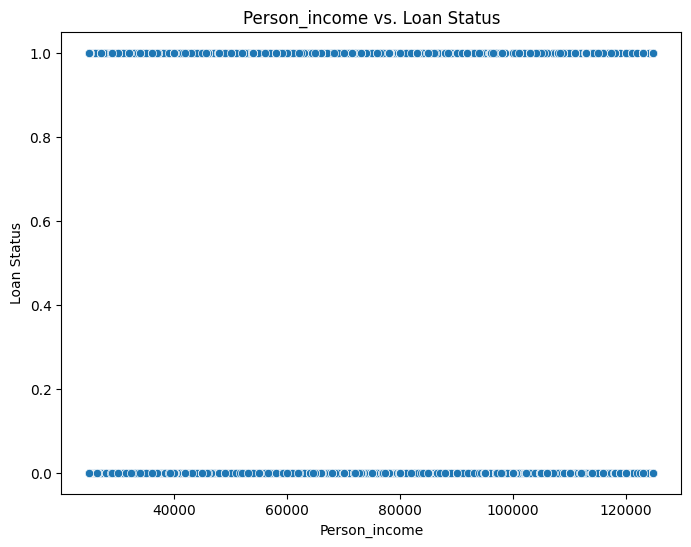

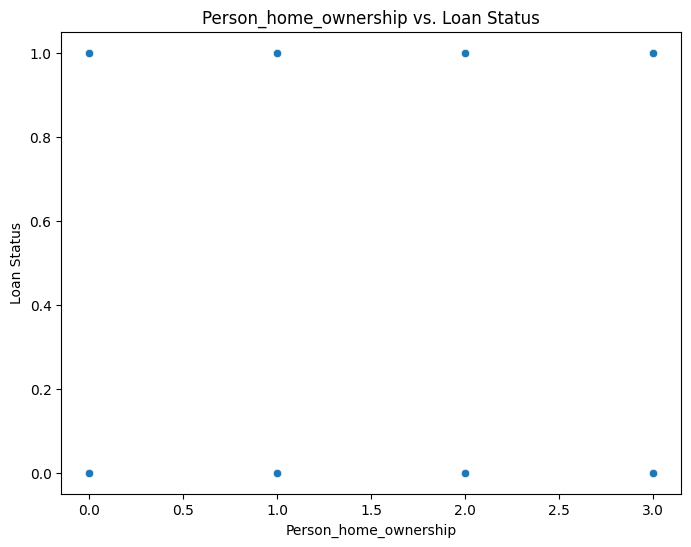

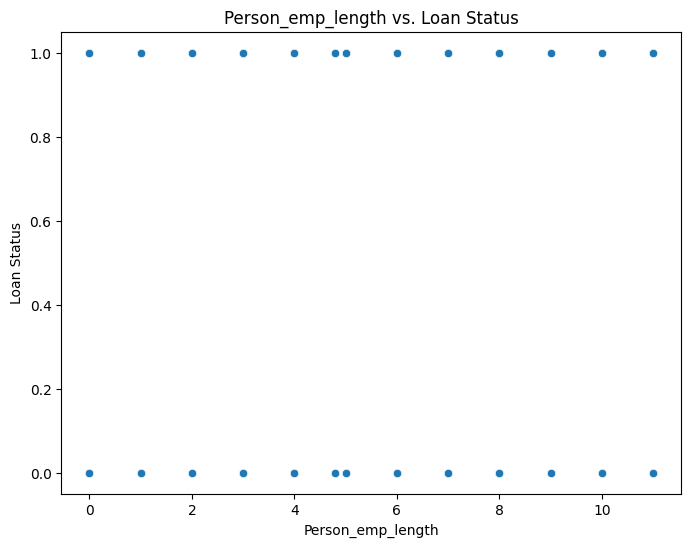

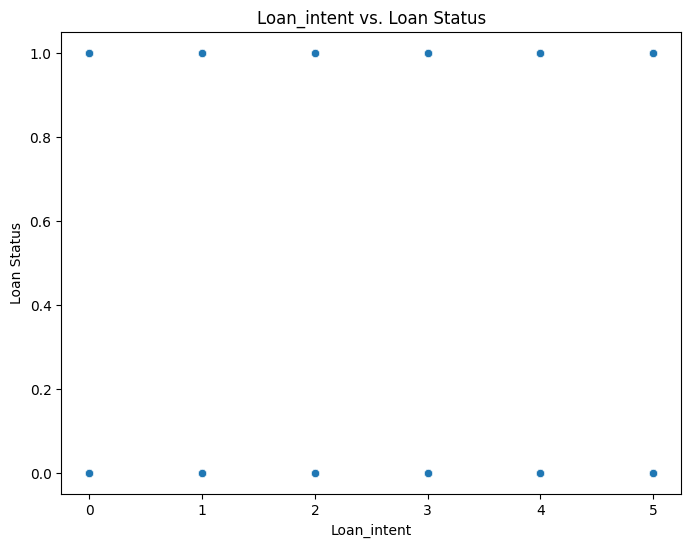

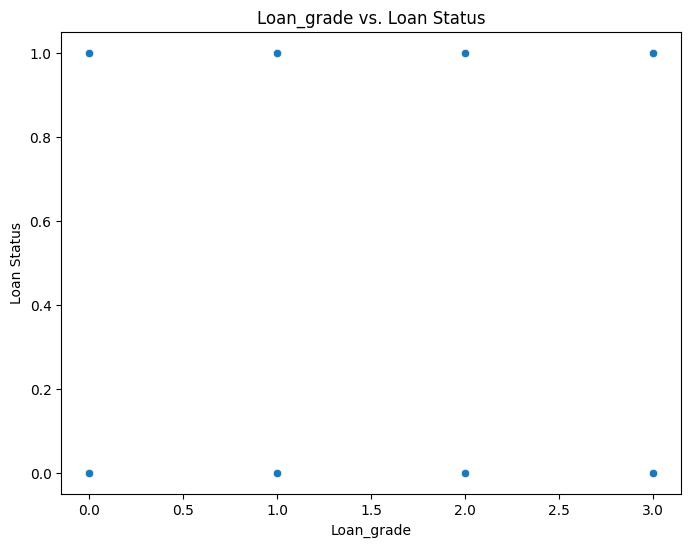

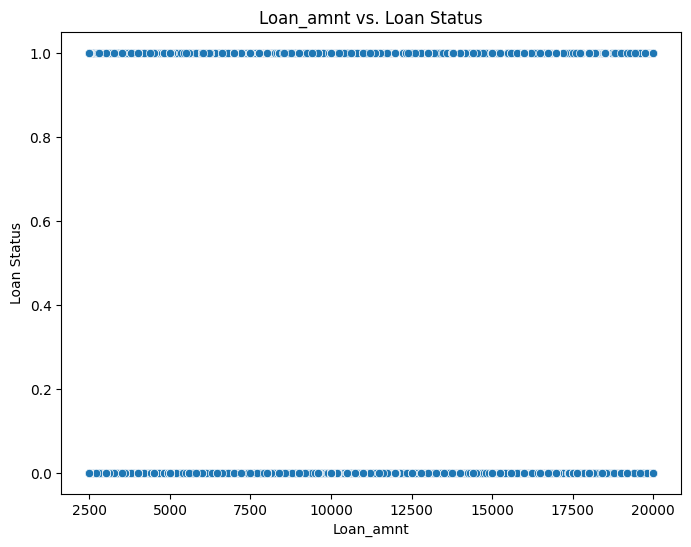

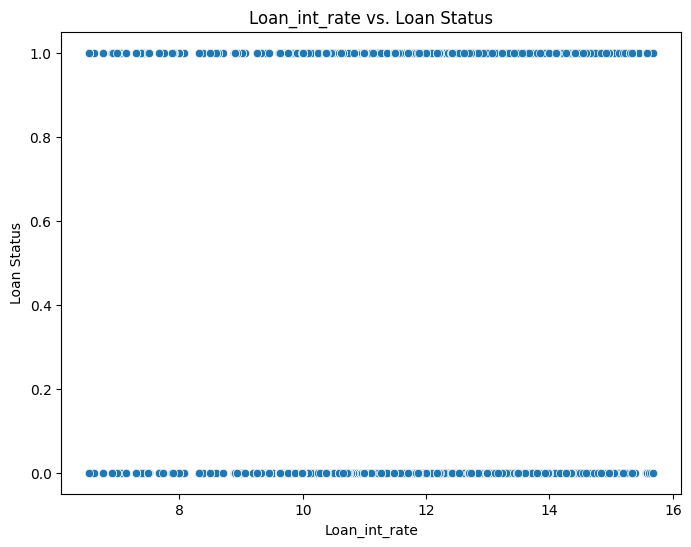

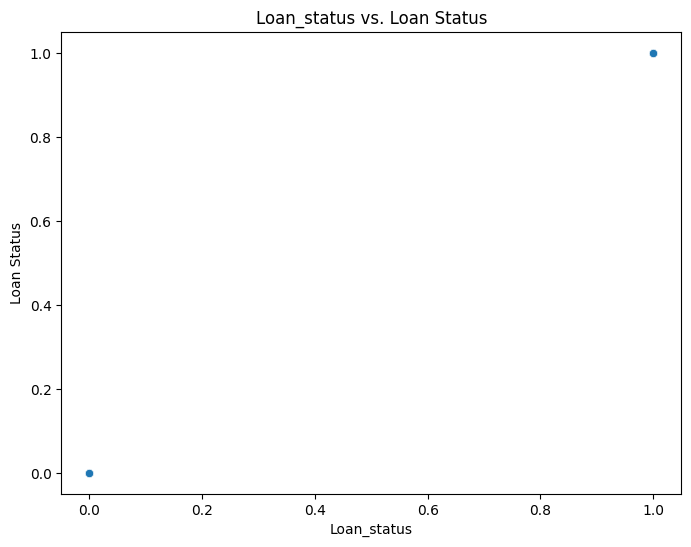

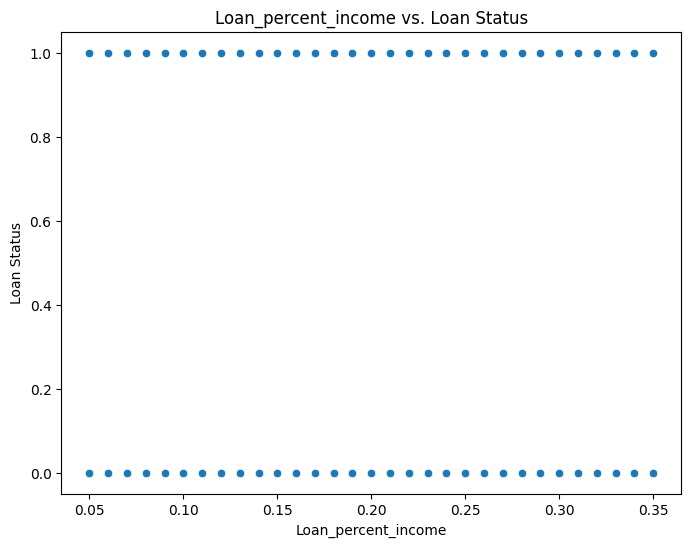

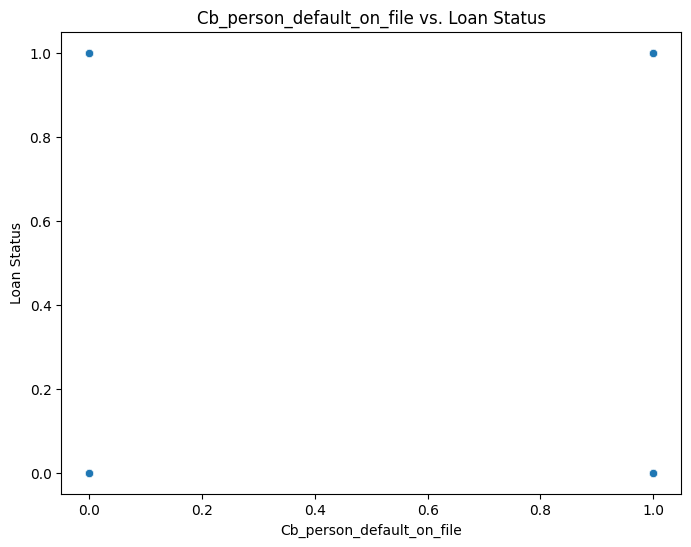

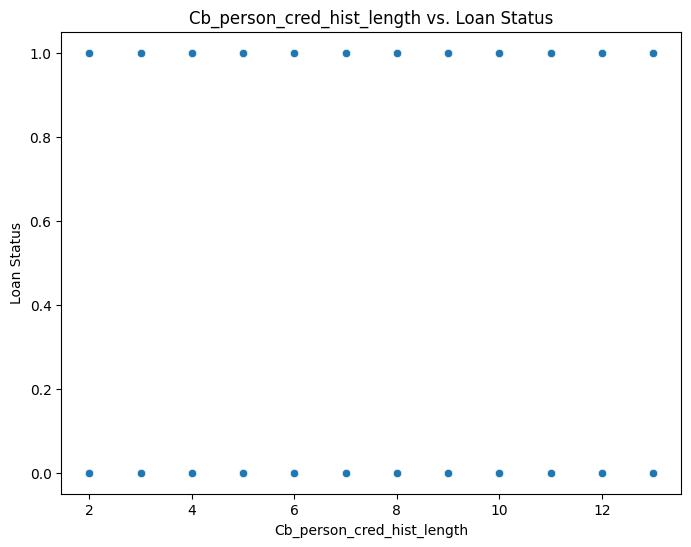

In [51]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Printing numerical column names
print("Numerical columns:")
print(numerical_cols.tolist())

for feature in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='loan_status', data=df)
    plt.title(f'{feature.capitalize()} vs. Loan Status')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Loan Status')
    plt.show()

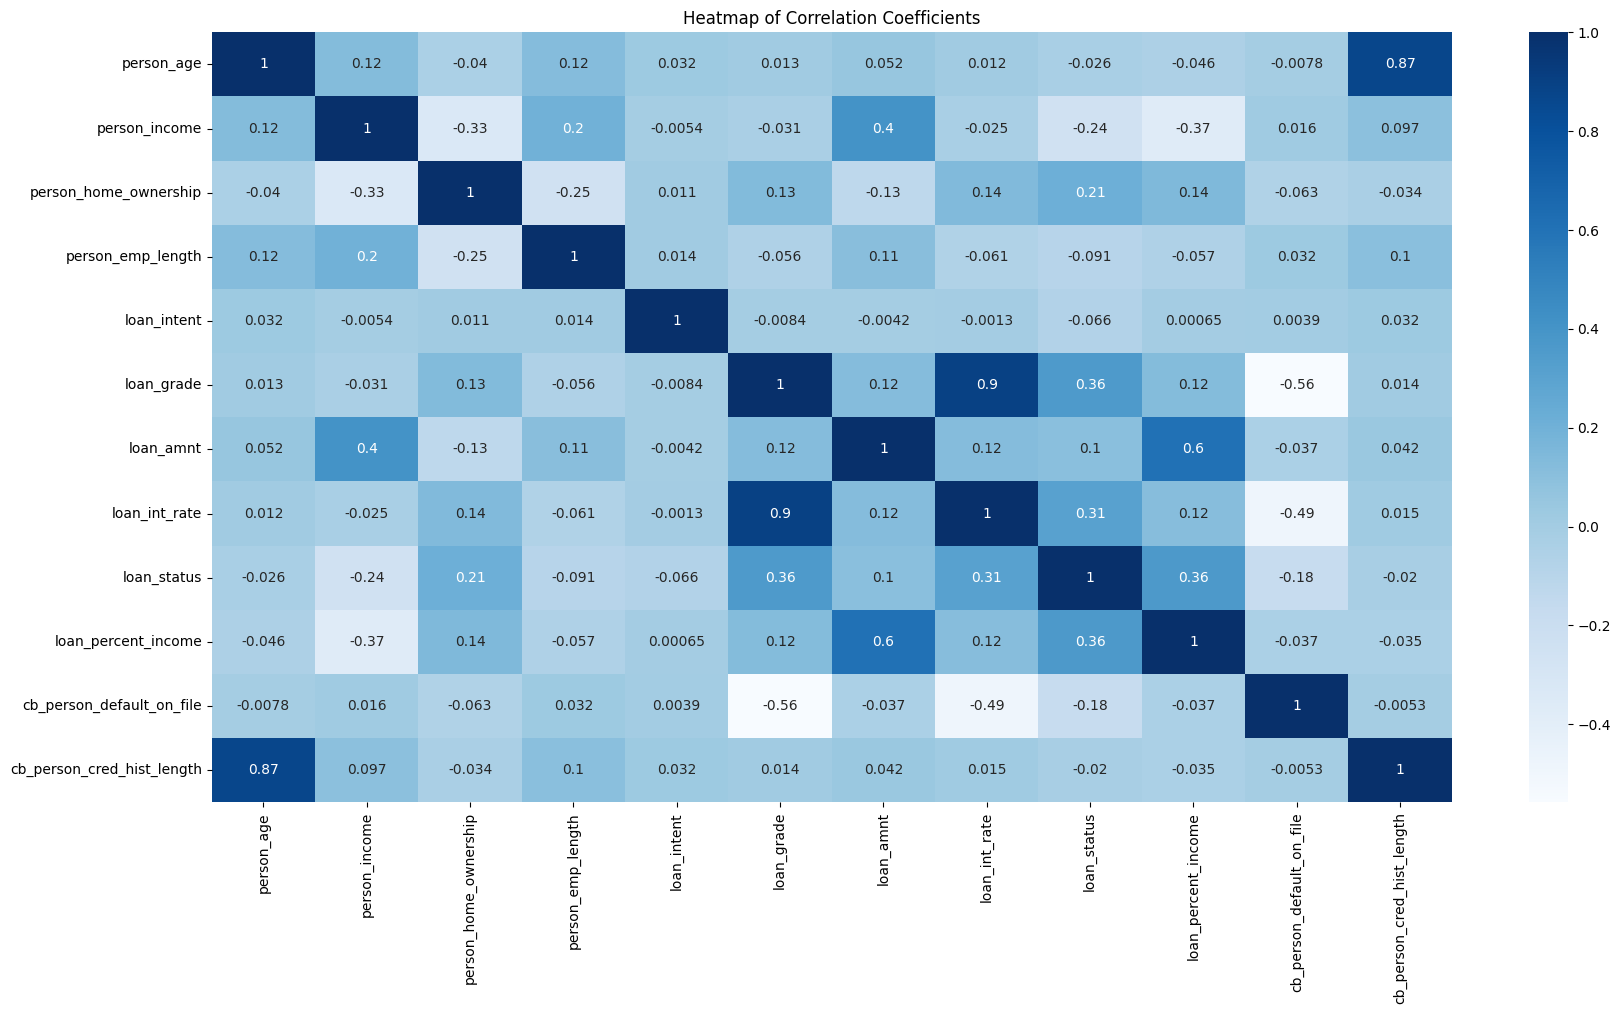

In [52]:
# Heat Map
correlation_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', cbar=True)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [54]:
print("Original Shape of X:", X.shape)
print("Original Shape of y:", y.shape)
print("\nOriginal class distribution:\n", y.value_counts())

Original Shape of X: (32581, 11)
Original Shape of y: (32581,)

Original class distribution:
 loan_status
0    25473
1     7108
Name: count, dtype: int64


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [56]:
#Applying SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE on training data:")
print("X_train_sm shape:", X_train_sm.shape)
print("y_train_sm distribution:\n", y_train_sm.value_counts())


After SMOTE on training data:
X_train_sm shape: (40756, 11)
y_train_sm distribution:
 loan_status
0    20378
1    20378
Name: count, dtype: int64


#Feature Scaling

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

In [59]:
model=[]
name=[]
res=[]

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
name = []
res = []

# Training Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_sm)

# Predicting on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluating metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Accuracy
testing_accuracy = accuracy_score(y_test, y_pred)
print(f'The  accuracy with the Random Forest model is {testing_accuracy:}')

# Store results
name.append('RandomForestClassifier')
res.append(testing_accuracy)


[[4795  300]
 [ 377 1045]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5095
           1       0.78      0.73      0.76      1422

    accuracy                           0.90      6517
   macro avg       0.85      0.84      0.84      6517
weighted avg       0.89      0.90      0.90      6517

The  accuracy with the Random Forest model is 0.8961178456344944


ROC AUC: 0.92


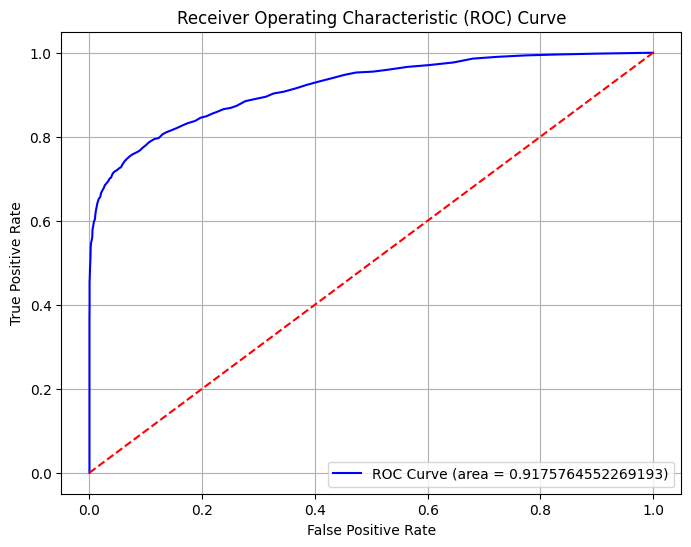

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating ROC AUC Score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')

# Generating ROC Curve data
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [62]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=42)

tree.fit(X_train_scaled, y_train_sm)
y_pred = tree.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Printing the accuracy score of the model
testing_accuracy = accuracy_score(y_test, y_pred)

print(f'The accuracy with the original data is {testing_accuracy}')

name.append(' DecisionTreeClassifier')
res.append(testing_accuracy)

[[4306  789]
 [ 344 1078]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.88      5095
           1       0.58      0.76      0.66      1422

    accuracy                           0.83      6517
   macro avg       0.75      0.80      0.77      6517
weighted avg       0.85      0.83      0.83      6517

The accuracy with the original data is 0.8261470001534449


In [63]:
!pip install lightgbm

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training the model
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_scaled, y_train_sm)

y_pred_lgbm = lgbm.predict(X_test_scaled)
testing_accuracy=accuracy_score(y_test, y_pred_lgbm)

print("LightGBM")
print("Accuracy:", testing_accuracy)
print(confusion_matrix(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))
print(f'The accuracy with the original data is {testing_accuracy}')


name.append(' LGBMClassifier')
res.append(testing_accuracy)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 20378, number of negative: 20378
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1326
[LightGBM] [Info] Number of data points in the train set: 40756, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM
Accuracy: 0.9220500230167255
[[4997   98]
 [ 410 1012]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5095
           1       0.91      0.71      0.80      1422

    accuracy                           0.92      6517
   macro avg       0.92      0.85      0.88      6517
weighted avg       0.92      0.92      0.92      6517

The accuracy with the original data is 0.9220500230167255


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [64]:
!pip install xgboost

from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train_sm)
y_pred_xgb = xgb.predict(X_test_scaled)
testing_accuracy=accuracy_score(y_test, y_pred_xgb)

print(" XGBoost")
print("Accuracy:", testing_accuracy )
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(f'The accuracy with the original data is {testing_accuracy}')



name.append(' XGBClassifier')
res.append(testing_accuracy)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:10:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost
Accuracy: 0.9295688200092067
[[5013   82]
 [ 377 1045]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5095
           1       0.93      0.73      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.93      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517

The accuracy with the original data is 0.9295688200092067


In [65]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

ada_model.fit(X_train_scaled, y_train_sm)

y_pred = ada_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
testing_accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy with AdaBoost is {testing_accuracy}')

name.append('AdaBoostClassifier')
res.append(testing_accuracy)

[[4338  757]
 [ 426  996]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      5095
           1       0.57      0.70      0.63      1422

    accuracy                           0.82      6517
   macro avg       0.74      0.78      0.75      6517
weighted avg       0.84      0.82      0.82      6517

The accuracy with AdaBoost is 0.8184747583243824


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train_sm)
y_pred_lr = lr.predict(X_test_scaled)
testing_accuracy=accuracy_score(y_test, y_pred_lr)

print("Logistic Regression")
print("Accuracy:", testing_accuracy)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(f'The accuracy with the original data is {testing_accuracy}')


name.append('Logistic Regression')
res.append(testing_accuracy)


Logistic Regression
Accuracy: 0.7709068589841952
[[3988 1107]
 [ 386 1036]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      5095
           1       0.48      0.73      0.58      1422

    accuracy                           0.77      6517
   macro avg       0.70      0.76      0.71      6517
weighted avg       0.82      0.77      0.79      6517

The accuracy with the original data is 0.7709068589841952


['RandomForestClassifier', ' DecisionTreeClassifier', ' LGBMClassifier', ' XGBClassifier', 'AdaBoostClassifier', 'Logistic Regression']
[0.8961178456344944, 0.8261470001534449, 0.9220500230167255, 0.9295688200092067, 0.8184747583243824, 0.7709068589841952]


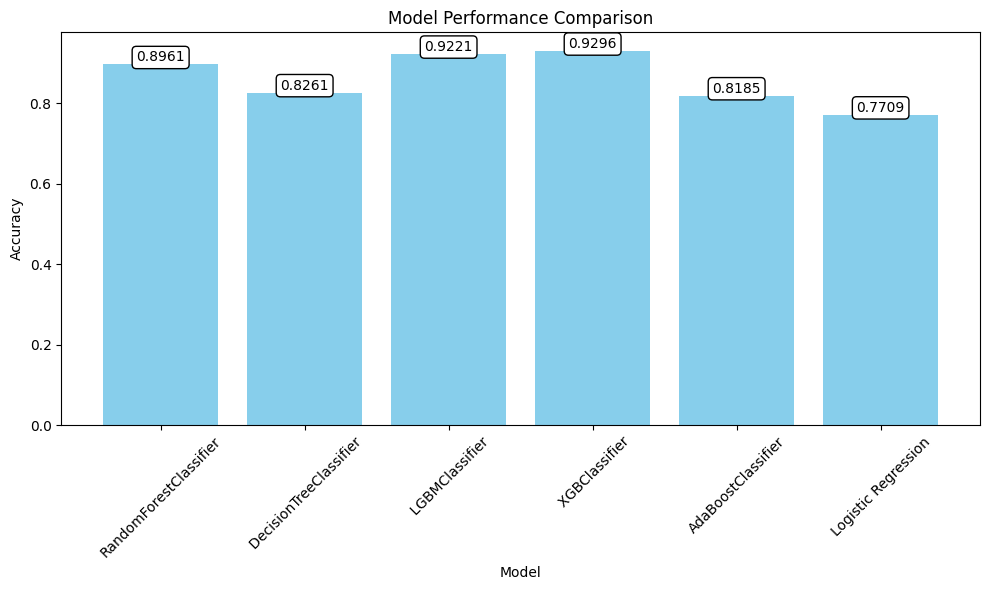

In [67]:
print(name)
print(res)

plt.figure(figsize=(10, 6))
bars = plt.bar(name, res, color='skyblue')

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, h, f'{h:.4f}',ha='center', va='bottom',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black')
    )

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
